# CardioRisk Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Problem Statement

CardioCare, a healthcare provider, is committed to enhancing preventative care and improving patient outcomes. With the growing prevalence of cardiovascular disease (CVD), accurate and timely risk assessment is essential. Although CardioCare might provide comprehensive medical resources, optimising doctors' valuable consultation time is crucial for efficient and effective care. At the same time, correctly identifying at-risk patients is highly important.

### Business Objective

CardioCare aims to develop a machine learning model to predict CVD risk using patient health data. This model is intended to support healthcare providers in efficiently allocating resources and optimising doctors' consultation time. By identifying patients with high risk of CVD, the model can help prioritise consultations and potentially eliminate the need for an initial consultation stage for some patients. This will allow doctors to focus their expertise on individuals requiring immediate attention.

### Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Exploratory Data Analysis
4. Train Validation Split
5. Feature Engineering
6. Model Building
8. Prediction and Model Evaluation

**Based on this assignment, you have to answer the following questions:**

- What insights can we gain from exploring the relationships between different health metrics and the prevalence of cardiovascular disease within the patient population?

- Based on the analysis, which patient characteristics emerge as the strongest predictors of cardiovascular disease risk? Are there any surprising or unexpected findings?

- How effectively can machine learning models identify individuals at risk of developing cardiovascular disease based on their health data? How does the evaluation results vary across different models?

- How can CardioCare integrate the predictive model into their existing healthcare workflows to enhance preventative care strategies?

### Data Dictionary

The CardioRisk Prediction has 14 Columns and 70000 Rows. Following data dictionary provides the description for each column present in dataset:


<table>
  <tr>
    <th>Column Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Unnamed: 0</td>
    <td>Index or row number</td>
  </tr>
  <tr>
    <td>id</td>
    <td>Unique identifier for each individual in the dataset</td>
  </tr>
  <tr>
    <td>age</td>
    <td>Age of the individual, measured in days</td>
  </tr>
  <tr>
    <td>gender</td>
    <td>Gender of the individual (1: Female, 2: Male)</td>
  </tr>
  <tr>
    <td>height</td>
    <td>Height of the individual, measured in centimeters</td>
  </tr>
  <tr>
    <td>weight</td>
    <td>Weight of the individual, measured in kilograms</td>
  </tr>
  <tr>
    <td>ap_hi</td>
    <td>Systolic blood pressure reading</td>
  </tr>
  <tr>
    <td>ap_lo</td>
    <td>Diastolic blood pressure reading</td>
  </tr>
  <tr>
    <td>cholesterol</td>
    <td>Cholesterol level (1: normal, 2: above normal, 3: well above normal)</td>
  </tr>
  <tr>
    <td>gluc</td>
    <td>Glucose level (1: normal, 2: above normal, 3: well above normal)</td>
  </tr>
  <tr>
    <td>smoke</td>
    <td>Smoking status (0: No, 1: Yes)</td>
  </tr>
  <tr>
    <td>alco</td>
    <td>Alcohol intake status (0: No, 1: Yes)</td>
  </tr>
  <tr>
    <td>active</td>
    <td>Physical activity status (0: No, 1: Yes)</td>
  </tr>
  <tr>
    <td>cardio</td>
    <td>Presence or absence of cardiovascular disease (0: No Disease, 1: Disease)</td>
  </tr>
</table>

</body>
</html>


    
This data dictionary serves as a reference for understanding the dataset and its variables.

## **1. Data Understanding**

<font color = red>[2 marks]</font> <br>

In this stage, you have to load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

In [2]:
# suggested imports; import more libraries as needed
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, \
    confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### **1.1 Load the dataset**

<font color = red>[2 marks]</font> <br>

In [3]:
# Load the dataset
df=pd.read_csv('/content/drive/MyDrive/uG-DS & AI/Course 6 - Advanced Machine Learning/Assignment/health_data.csv')

#### **1.1.1** Check the first few entries

In [4]:
# Check the first few entries
display(df.head())

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


#### **1.1.2** Remove columns which are irrelevant <font color = red>[2 marks]</font> <br>

In [5]:
# Remove irrelevant columns like unique identifiers or index
cols_to_drop = ['Unnamed: 0', 'id']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


#### **1.1.3** Inspect the shape of the dataset

In [6]:
# Inspect the shape of the dataset
print(f"Dataset Dimensions: {df.shape}")

Dataset Dimensions: (70000, 12)


#### **1.1.4** Inspect the different columns in the dataset

In [7]:
# Inspect the different columns in the dataset
print("\nData Structure:")
df.info()


Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  float64
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  float64
 5   ap_lo        70000 non-null  float64
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 6.4 MB


Check the summary of the dataset

In [8]:
# Check the summary of the dataset
display(df.describe())

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,0.349571,164.359229,74.205690,128.817286,96.630414,0.366871,0.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


## **2. Data Cleaning**

<font color = red>[8 marks]</font> <br>

### **2.1 Identify and handle redundant or invalid/illogical physiological values**

<font color = red>[6 marks]</font> <br>

Examine the dataset to identify any columns containing data points that are invalid, illogical, or fall outside of typical physiological ranges.

- Pay attention to blood pressure values and ensure they fall within reasonable physiological limits. Very high or low values might need to be investigated or addressed. Blood pressure values less than 30 and more than 300 are rarely observed.
- Additionally, think about which unit might be more intuitive for understanding a person's age in a healthcare context.
- Similarly, reflect on the representation of height and explore whether using a different unit would align better with typical practices in healthcare and enhance the overall interpretability of the data.

#### **2.1.1** Check the statistical summary of the data <font color = red>[1 marks]</font> <br>

Examine the statistical summary to identify the columns containing data points that are invalid, illogical, or fall outside of typical physiological ranges.

In [9]:
# Check the statistical summary of the data
print("Statistical Summary for Outlier Detection:")
display(df.describe())

Statistical Summary for Outlier Detection:


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,0.349571,164.359229,74.205690,128.817286,96.630414,0.366871,0.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


#### **2.1.2** Handle rows with invalid/illogical values <font color = red>[3 marks]</font> <br>

Based on the details of data present in statistical summary, handle the columns that have invalid/illogical values or does not fall within physiological limits or have extreme values.

In [10]:
# Handle rows which have invalid or illogical values or does not fall within physiological limits (include extreme cases) for blood pressure and height etc
# Filtering Blood Pressure based on provided clinical limits (30-300)
df = df[(df['ap_hi'] >= 30) & (df['ap_hi'] <= 300)]
df = df[(df['ap_lo'] >= 30) & (df['ap_lo'] <= 300)]

# Logical check: Systolic must be strictly greater than Diastolic
df = df[df['ap_hi'] > df['ap_lo']]

# Displaying new dimensions and summary to verify the fix
print(f"Dataset Dimensions after BP cleaning: {df.shape}")
display(df.describe())


Dataset Dimensions after BP cleaning: (68678, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68678.000000,68678.000000,68678.000000,68678.000000,68678.000000,68678.000000,68678.000000,68678.000000,68678.000000,68678.000000,68678.000000,68678.000000
mean,19464.649291,0.348627,164.361135,74.118910,126.674568,81.302892,0.364644,0.225705,0.087961,0.053350,0.803358,0.494714
std,2468.122563,0.476539,8.183517,14.331441,16.694929,9.466549,0.678875,0.571571,0.283241,0.224733,0.397462,0.499976
min,10798.000000,0.000000,55.000000,11.000000,60.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17658.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,19701.500000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,1.000000,250.000000,200.000000,240.000000,182.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


#### **2.1.3** Modify the representation of patient age and height <font color = red>[2 marks]</font> <br>

In [11]:
# Modify the representation of patient age and height (to years and meters) for better understanding in a healthcare context

# Convert age from days to years (approx. 365.25 days per year)
df['age'] = (df['age'] / 365.25).round(1)

# Convert height from centimeters to meters
df['height'] = df['height'] / 100

# Preview the changes
print("Updated Age (Years) and Height (Meters):")
display(df[['age', 'height']].head())

Updated Age (Years) and Height (Meters):


,age,height
0,50.4,1.68
1,55.4,1.56
2,51.6,1.65
3,48.2,1.69
4,47.8,1.56


### **2.2 Fix DataTypes**

<font color = red>[2 marks]</font> <br>

#### **2.2.1** Review and fix the data types of all columns <font color = red>[2 marks]</font> <br>

Ensuring the columns accurately reflect the nature of the data

In [12]:
# Fix DataTypes of the categorical columns with incorrect DataTypes

# Defining categorical columns based on the data dictionary
cat_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Converting identified columns to category type for better memory efficiency and model handling
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [13]:
# Check the final data types post conversion
# Check final data types and non-null counts
print("Final Column Data Types:")
df.info()

Final Column Data Types:
<class 'pandas.core.frame.DataFrame'>
Index: 68678 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          68678 non-null  float64 
 1   gender       68678 non-null  category
 2   height       68678 non-null  float64 
 3   weight       68678 non-null  float64 
 4   ap_hi        68678 non-null  float64 
 5   ap_lo        68678 non-null  float64 
 6   cholesterol  68678 non-null  category
 7   gluc         68678 non-null  category
 8   smoke        68678 non-null  category
 9   alco         68678 non-null  category
 10  active       68678 non-null  category
 11  cardio       68678 non-null  int64   
dtypes: category(6), float64(5), int64(1)
memory usage: 4.1 MB


## **3. Exploratory Data Analysis**

<font color = red>[27 marks]</font>

### **3.1 Perform univariate analysis**

<font color = red>[12 marks]</font>

#### **3.1.1** Visualise the numerical features <font color = red>[5 marks]</font>

Visualise the distribution of numerical features using appropriate plots to understand their characteristics.

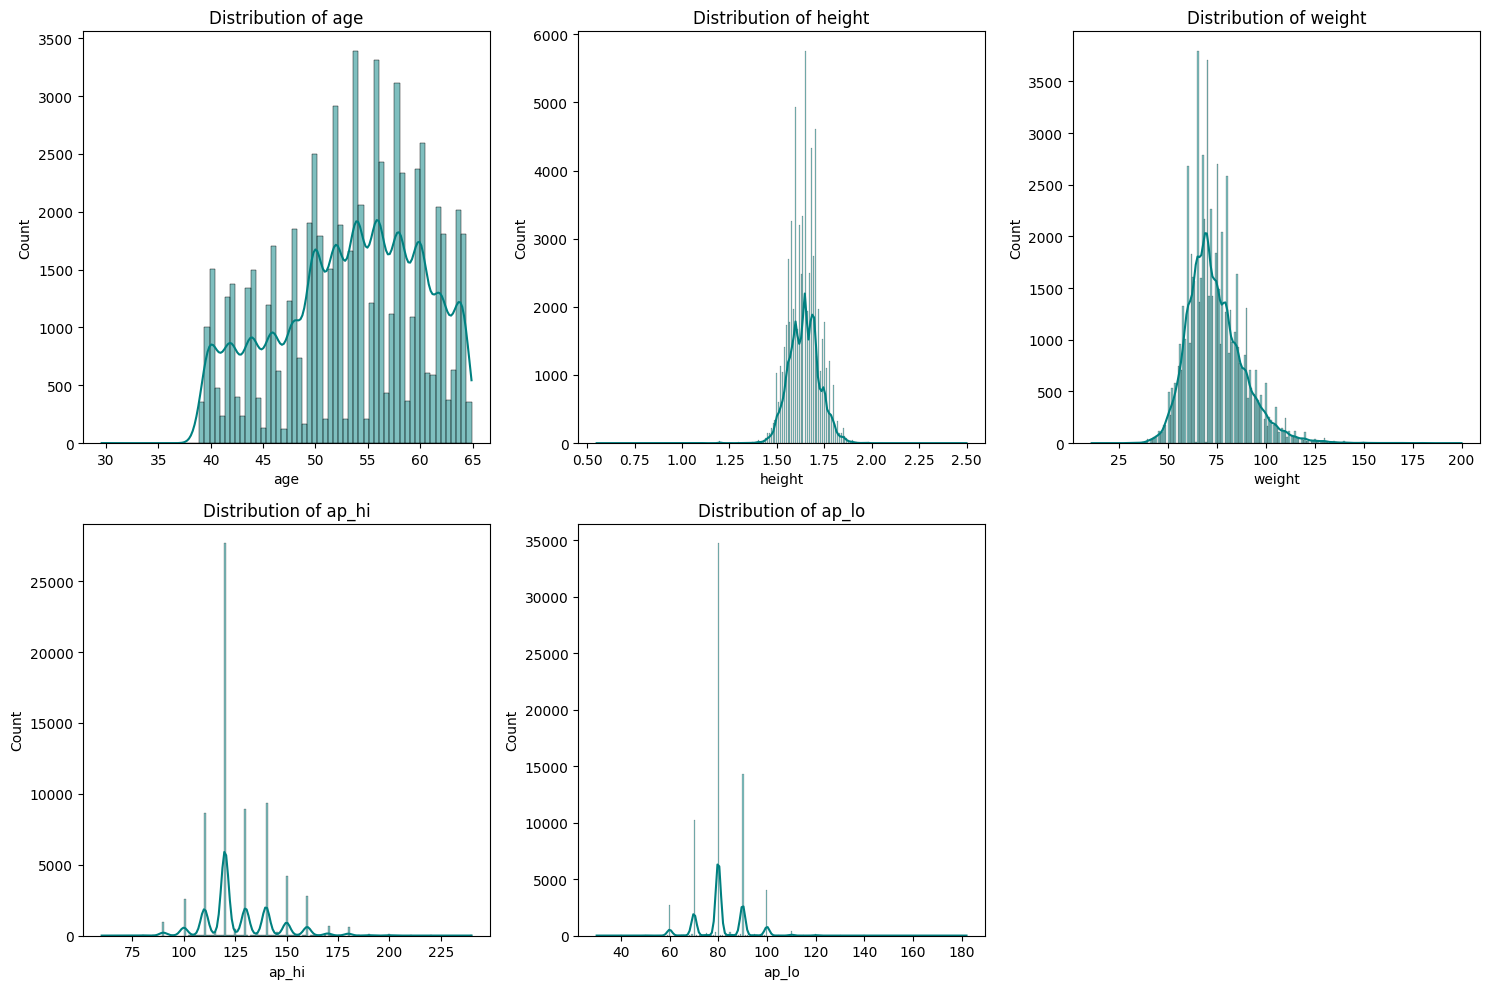

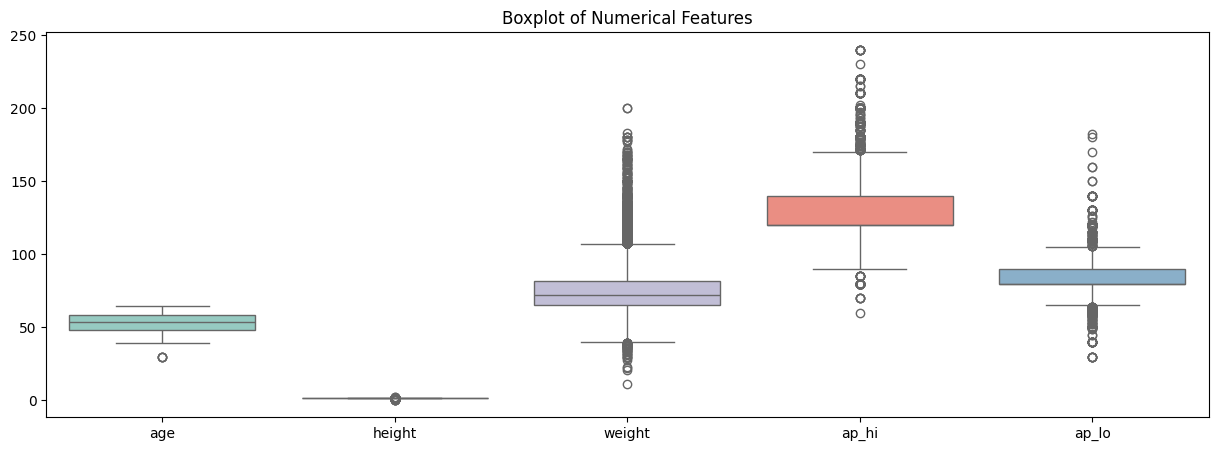

In [14]:
# Plot all the numerical columns to understand their distribution
# Identifying numerical columns
num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Setting up the figure for subplots
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

# Boxplots to check for remaining outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[num_cols], palette='Set3')
plt.title('Boxplot of Numerical Features')
plt.show()

#### **3.1.2** Visualise the categorical features <font color = red>[5 marks]</font>

Visualise the distribution of categorical features to get a clear view of the data distribution across various categories. This will help in identifying potential imbalances or dominant categories.

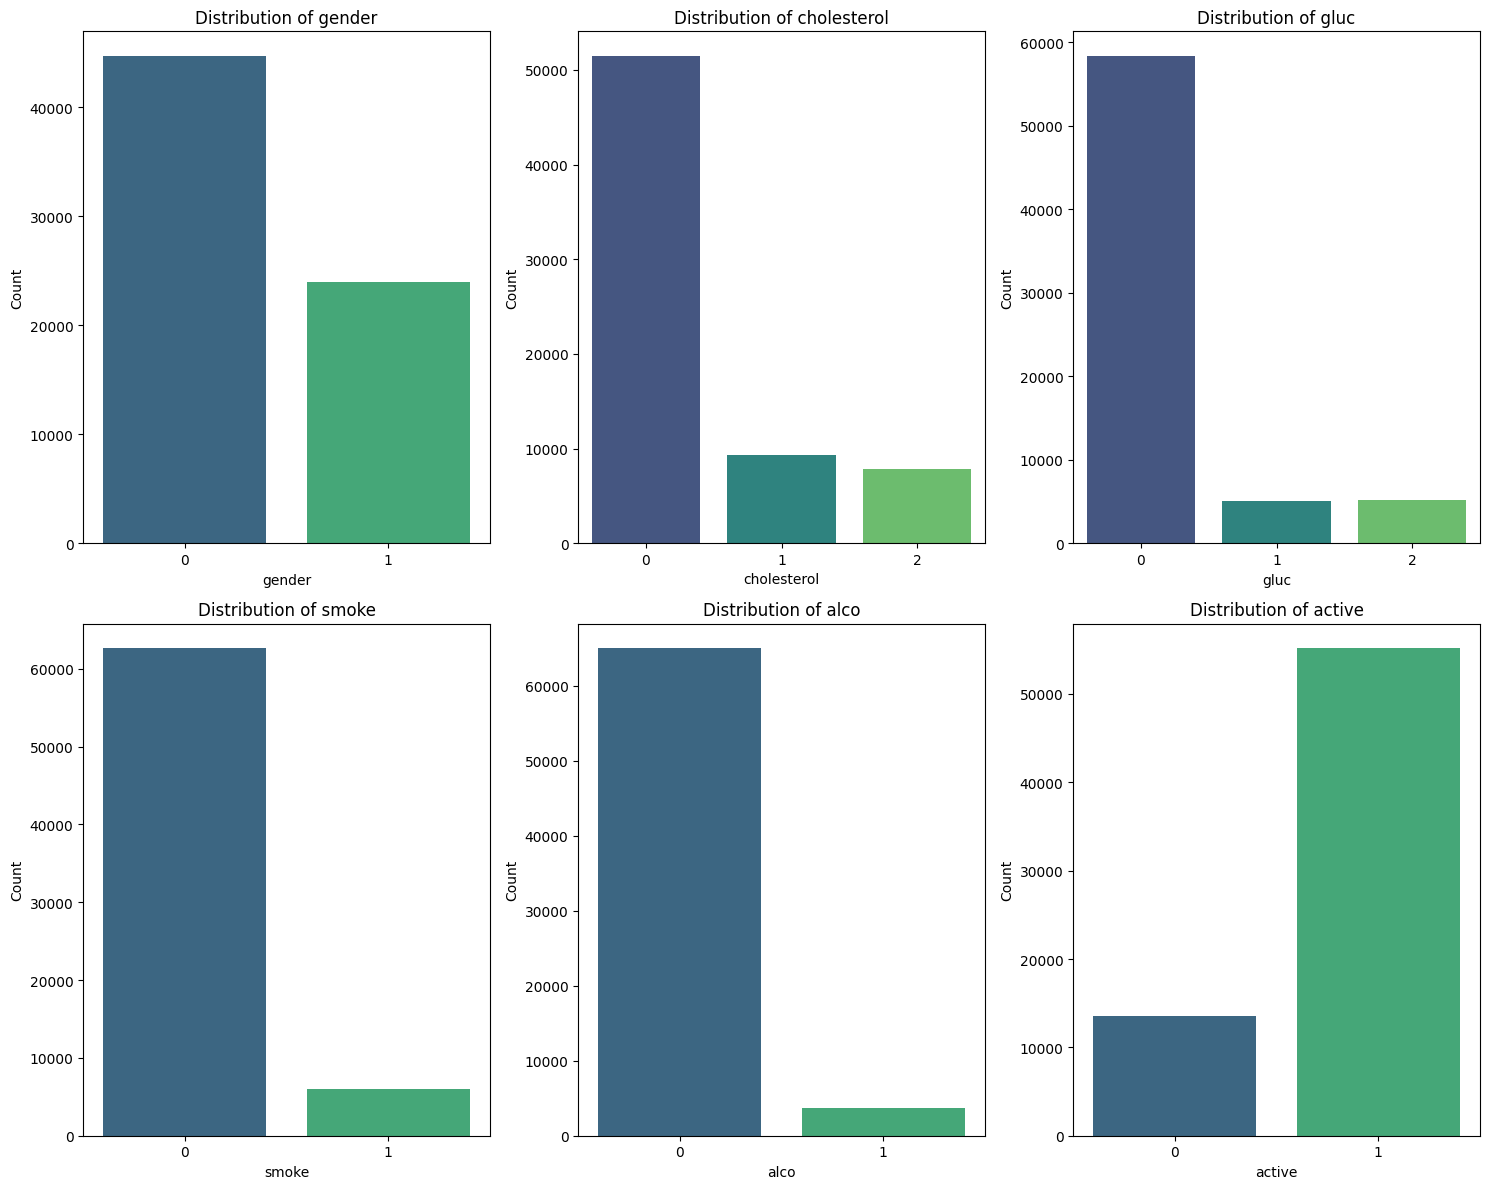

In [15]:
# Select and plot categorical columns
# Identifying categorical columns based on previous type conversion
cat_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

plt.figure(figsize=(15, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()


#### **3.1.3** Check class distribution of the target feature <font color = red>[2 marks]</font>

Target Class Counts:
cardio
0    34702
1    33976
Name: count, dtype: int64

Target Class Percentages:
cardio
0    50.528554
1    49.471446
Name: proportion, dtype: float64


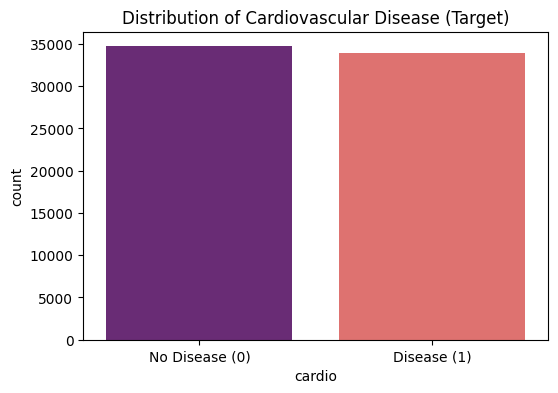

In [16]:
# Class distribution of positive and negative classes
# Calculating frequency and percentage of each class
cardio_counts = df['cardio'].value_counts()
cardio_pct = df['cardio'].value_counts(normalize=True) * 100

print("Target Class Counts:")
print(cardio_counts)
print("\nTarget Class Percentages:")
print(cardio_pct)

# Visualising the balance
plt.figure(figsize=(6, 4))
sns.countplot(x='cardio', data=df, palette='magma')
plt.title('Distribution of Cardiovascular Disease (Target)')
plt.xticks([0, 1], ['No Disease (0)', 'Disease (1)'])
plt.show()

### **3.2 Perform correlation analysis**

<font color = red>[5 marks]</font>

Investigate the relationships between numerical features to identify potential multicollinearity or dependencies. Visualise the correlation structure using an appropriate method to gain insights into feature relationships

#### **3.2.1** Visualise the correlation among numerical features <font color="red">[5 Marks]</font>


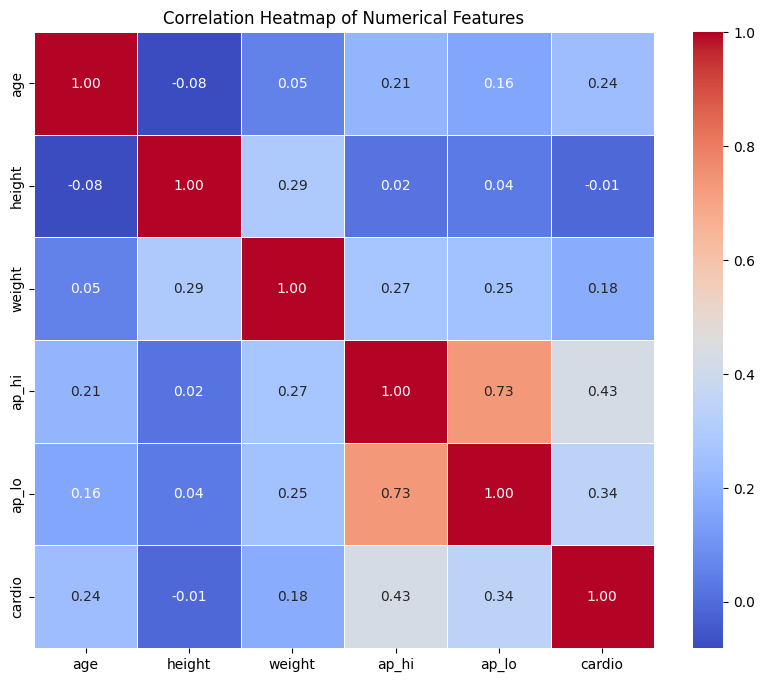

In [17]:
# Plot Heatmap of the correlation matrix
# Selecting only numerical columns for correlation analysis
# Note: categorical columns (gender, etc.) are excluded as they are now 'category' type
num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio']

plt.figure(figsize=(10, 8))
correlation_matrix = df[num_cols].corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### **3.3 Perform bivariate analysis**

<font color = red>[10 marks]</font>

#### **3.3.1** Analyse categorical features <font color="red">[5 Marks]</font>

For each categorical feature (excluding the target), calculate the proportion of `cardio = 1` in each category of the feature. Use this to identify which categorical features show clear differences in heart disease likelihood and which are less informative.

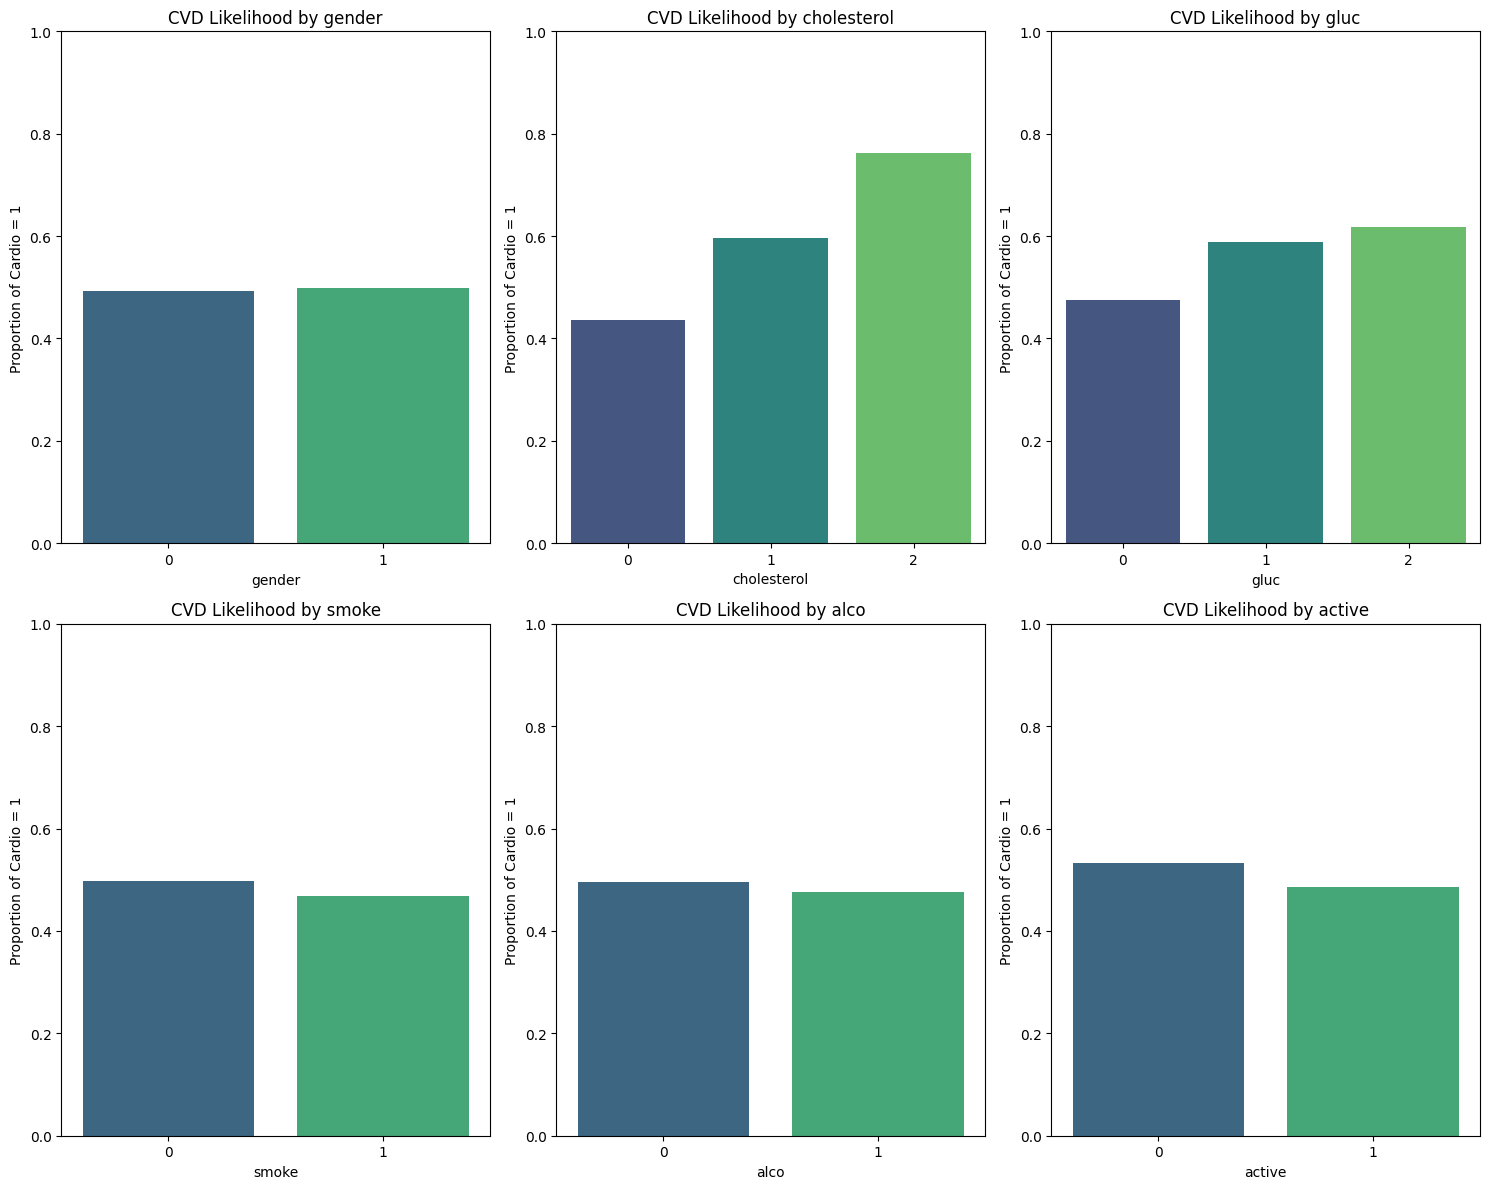

In [18]:
# Write a function to analyse the target variable likelihood for categorical features

def analyze_categorical_likelihood(df, cat_cols, target):
    """
    Calculates and plots the proportion of target = 1 for each category.
    """
    plt.figure(figsize=(15, 12))

    for i, col in enumerate(cat_cols, 1):
        plt.subplot(2, 3, i)

        # Calculate the likelihood of cardio=1 for each category
        likelihood = df.groupby(col)[target].mean().reset_index()

        sns.barplot(x=col, y=target, data=likelihood, palette='viridis')
        plt.title(f'CVD Likelihood by {col}')
        plt.ylabel('Proportion of Cardio = 1')
        plt.ylim(0, 1) # Set Y-axis to 0-1 for clear proportion comparison
        plt.tight_layout()

# [cite_start]Run the analysis for categorical columns [cite: 68]
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
analyze_categorical_likelihood(df, categorical_features, 'cardio')
plt.show()

#### **3.3.2** Explore the relationships between numerical features and the target variable <font color = red>[5 marks]</font>

Understand the impact of numeric features on the target outcome using appropriate visualisation techniques to identify trends and potential interactions

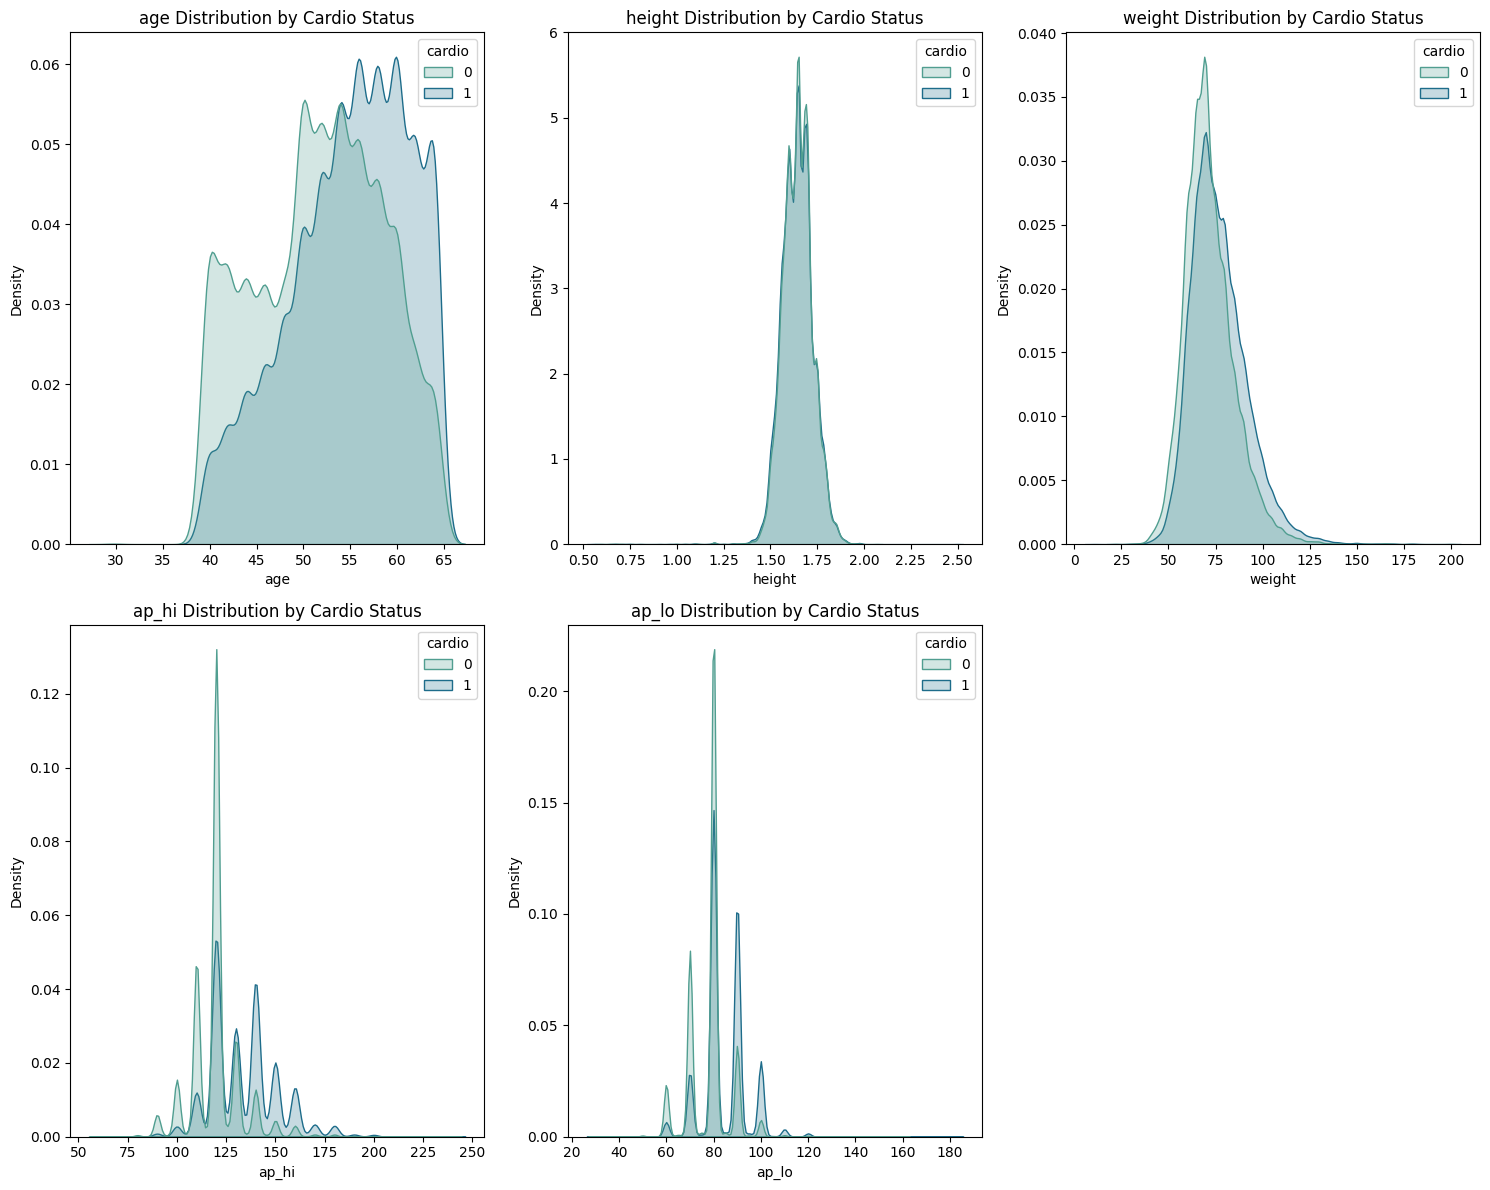

In [19]:
# Plot distribution for each numerical column with target variable
# Identifying numerical columns for bivariate analysis
num_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

plt.figure(figsize=(15, 12))

for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)

    # Using KDE plots to see the distribution overlap between cardio classes
    sns.kdeplot(data=df, x=col, hue='cardio', fill=True, common_norm=False, palette='crest')

    plt.title(f'{col} Distribution by Cardio Status')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()

plt.show()

## **4. Train-Test Split**

<font color = red>[5 marks]</font>

### **4.1 Data Splitting**

<font color = red>[5 Marks]</font>

#### **4.1.1** Define feature and target variables <font color = red>[2 Marks]</font>

In [24]:
# Put all the feature variables in X and target in y
# 'cardio' is our target variable; all other columns are features
X = df.drop('cardio', axis=1)
y = df['cardio']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Features (X) shape: (68678, 11)
Target (y) shape: (68678,)


#### **4.1.2** Split the data into train and test sets <font color="red">[3 Marks]</font>

Split the data in 0.7:0.3 sets. and reset the index for the sets. Check the shape of the test and test sets.


In [25]:
#  Split the data into 70% train data and 30% test data
# [cite_start]Splitting data with a 70:30 ratio [cite: 92]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Resetting indices for clean data handling
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Checking the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (48074, 11)
X_test shape: (20604, 11)


In [26]:
# Reset index for all train and test sets
# Resetting indices for clean data handling [1 Mark]
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print("Indices have been reset for X_train, X_test, y_train, and y_test.")

Indices have been reset for X_train, X_test, y_train, and y_test.


## **5. Feature Engineering**

<font color = red>[18 marks]</font>

### **5.1 Create a new feature**

<font color = red>[6 marks]</font>

#### **5.1.1** Create a new feature `BMI` (Body Mass Index) <font color="red">[3 Marks]</font>

BMI is a standard health metric calculated using a person's height and weight. BMI is known to be a useful predictor for cardiovascular risk.

In [27]:
# Create a new feature 'BMI'
# BMI Formula: weight (kg) / [height (m) ^ 2]
X_train['bmi'] = X_train['weight'] / (X_train['height'] ** 2)
X_test['bmi'] = X_test['weight'] / (X_test['height'] ** 2)

# Rounding for consistency
X_train['bmi'] = X_train['bmi'].round(2)
X_test['bmi'] = X_test['bmi'].round(2)

# Preview the new feature
print("First 5 rows with BMI (Training Set):")
display(X_train[['height', 'weight', 'bmi']].head())

First 5 rows with BMI (Training Set):


,height,weight,bmi
0,1.69,60.0,21.01
1,1.69,72.0,25.21
2,1.80,90.0,27.78
3,1.60,55.0,21.48
4,1.64,67.0,24.91


**Note:** Feel free to engineer more features if you wish to.

#### **5.1.2** Perform correlation analysis  <font color="red">[3 Marks]</font>

After creating the new feature `BMI`, perform correlation analysis to check if it's correlated with any existing features. Perform suitable processing steps if high correlation is found.

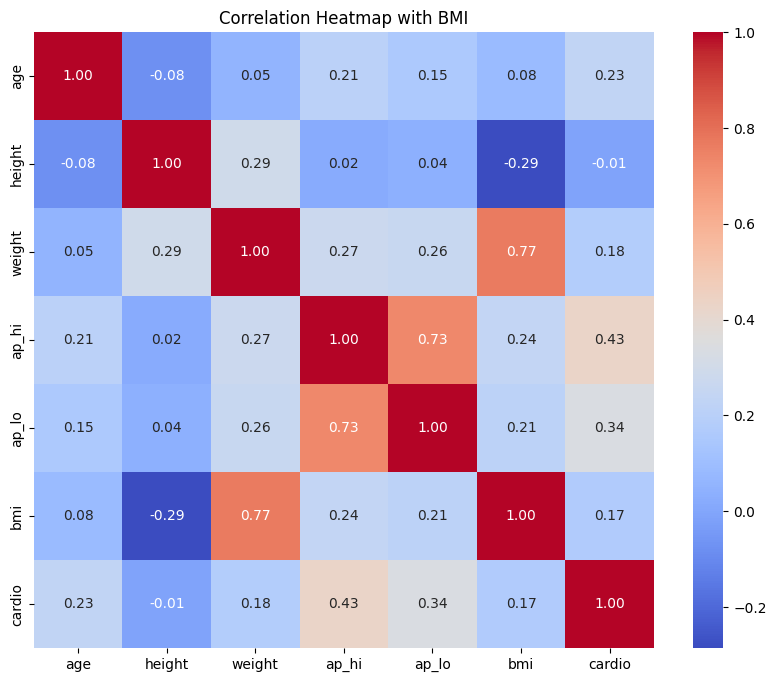

In [28]:
# Plot check correlation
# Combining training features and target for a comprehensive correlation check
train_data_corr = X_train.copy()
train_data_corr['cardio'] = y_train

# Selecting numerical features including the new BMI
num_cols_plus_bmi = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'cardio']

plt.figure(figsize=(10, 8))
sns.heatmap(train_data_corr[num_cols_plus_bmi].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with BMI')
plt.show()

In [ ]:
# Did you find any highly correlated features? What steps should you take


### **5.1.3 Identifying and Managing Highly Correlated Features**
The correlation heatmap reveals a high positive correlation (approximately **0.77**) between **BMI** and **weight**. This is expected since weight is a primary component of the BMI calculation. Additionally, a strong correlation remains between **systolic (`ap_hi`)** and **diastolic (`ap_lo`)** blood pressure (approximately **0.73**).

**Recommended Steps:**
1. **Monitor Model Performance:** While these correlations are high, they are below the standard threshold ($>0.80$ or $0.90$) for immediate removal in many machine learning contexts.
2. **Retain for Initial Training:** We will keep these features for the initial model training to allow the algorithms (SVM and Decision Trees) to determine their relative importance.
3. **Feature Selection (Optional):** If the model shows signs of overfitting or instability, we may consider dropping the raw `weight` and `height` in favor of the consolidated `bmi` feature later.

### **5.2 Combine Values in Categorical Columns**

<font color="red">[4 Marks]</font>

#### **5.2.1** Combine Low-Frequency Categories <font color="red">[4 Marks]</font>

During the EDA process, categorical columns with multiple unique levels may be identified. To enhance model performance, it is recommended to refine these categorical features by grouping values that have low frequency or provide limited predictive information.

Combine categories that occur infrequently or exhibit similar behavior to reduce sparsity and improve model generalisation.

In [29]:
 # Combine categories that have low frequency or provide limited predictive information such as gluc and cholesterol
# For cholesterol and gluc:
# Original: 1: normal, 2: above normal, 3: well above normal
# New Mapping: 0: Normal (from 1), 1: Elevated (from 2 & 3)

def map_health_levels(value):
    if value == 1:
        return 0 # Normal
    else:
        return 1 # Elevated

# Applying the mapping to both training and test sets to maintain consistency
for feature in ['cholesterol', 'gluc']:
    X_train[feature] = X_train[feature].apply(map_health_levels).astype('category')
    X_test[feature] = X_test[feature].apply(map_health_levels).astype('category')

# Verifying the new distribution
print("New Cholesterol Distribution (Training Set):")
print(X_train['cholesterol'].value_counts())

print("\nNew Glucose Distribution (Training Set):")
print(X_train['gluc'].value_counts())


New Cholesterol Distribution (Training Set):
cholesterol
1    41492
0     6582
Name: count, dtype: int64

New Glucose Distribution (Training Set):
gluc
1    44498
0     3576
Name: count, dtype: int64


### **5.3 Dummy variable creation**

<font color = red>[5 marks]</font>

#### **5.3.1** Create dummy variables for categorical columns <font color="red">[5 Mark]</font>

In [30]:
# Identify the columns for creating dummy variables
# Categorical columns to be transformed
# Listing the features that represent categories rather than continuous measurements
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

print("Categorical columns identified for dummy variable creation:")
print(categorical_cols)

Categorical columns identified for dummy variable creation:
['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']


In [31]:
# Create dummy variables for independent columns on training data
# Transforming training categories into numerical dummy variables
# We use drop_first=True to prevent multicollinearity
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

# Checking the new structure of the training features
print(f"X_train now has {X_train.shape[1]} features.")
X_train.head()

X_train now has 12 features.


,age,height,weight,ap_hi,ap_lo,bmi,gender_1,cholesterol_1,gluc_1,smoke_1,alco_1,active_1
0,43.6,1.69,60.0,120.0,80.0,21.01,False,True,True,False,False,True
1,39.4,1.69,72.0,110.0,70.0,25.21,False,True,True,False,False,True
2,60.2,1.80,90.0,140.0,80.0,27.78,True,True,True,False,False,True
3,54.1,1.60,55.0,120.0,80.0,21.48,False,True,True,False,False,False
4,61.7,1.64,67.0,120.0,80.0,24.91,False,True,True,False,False,False


In [32]:
# Create dummy variables for independent columns on test data
# Transforming test categories into numerical dummy variables
# Ensuring consistency with the training set transformation
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Verifying the structure of the test features
print(f"X_test now has {X_test.shape[1]} features.")
X_test.head()

X_test now has 12 features.


,age,height,weight,ap_hi,ap_lo,bmi,gender_1,cholesterol_1,gluc_1,smoke_1,alco_1,active_1
0,63.5,1.73,85.0,120.0,80.0,28.40,True,True,True,False,False,True
1,60.1,1.82,117.0,120.0,80.0,35.32,True,True,True,False,False,True
2,60.0,1.71,68.0,120.0,70.0,23.26,False,True,True,False,False,True
3,49.4,1.58,75.0,120.0,80.0,30.04,False,True,True,False,False,True
4,40.0,1.59,69.0,100.0,60.0,27.29,False,True,True,False,False,True


### **5.4 Feature scaling**

<font color = red>[3 marks]</font>

#### **5.4.1** Scale numerical features <font color = red>[3 marks]</font>

Choose a scaling method appropriate for the data and the chosen model. Apply the same scaling to both training and test data.

In [33]:
# Scale the numeric features present in the training data

# Initializing the Min-Max Scaler
scaler = MinMaxScaler()

# Defining the numerical columns to be scaled
num_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

# Fitting the scaler to the training data and transforming it
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Verifying the transformation (Min should be 0, Max should be 1)
print("Training set numerical features scaled:")
display(X_train[num_cols].describe().loc[['min', 'max']])

Training set numerical features scaled:


,age,height,weight,ap_hi,ap_lo,bmi
min,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0


## **6. Model Building**

<font color = red>[38 marks]</font>

In this task, you will build the two machine learning models: Support Vector Classifier (SVC) and a Decision Tree classifier. We will follow the same structured workflow for the models:

* *Model Building and Initial Evaluation*: <br> Fit the model and evaluate its performance on the training data using the default cutoff
* *Find the Optimal Cutoff*: <br> Determine the best probability threshold using sensitivity-specificity and precision–recall trade-offs
* *Model Prediction & Evaluation using chosen cutoff*: <br> Generate predictions using the chosen cutoff and evaluate performance on the training data
* *Hyperparameter Tuning (Grid Search)*: <br> Optimise performance using grid search for hyperparameter tuning
* *Final Model Training & Evaluation using chosen cutoff*: <br> Train the final model using the best hyperparameters and evaluate performance on the training data

### **6.1 SVM Classifier**

<font color = red>[18 marks]</font>

#### **6.1.1** Define a Linear SVM classifier and fit it on the train set <font color = red>[2 mark]</font>

Go through the [SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) and define a model with linear kernel that will also return the probabilities estimates of the predictions.

In [34]:
# Define and fit linear SVM
# We use kernel='linear' as required
# probability=True is essential for the predict_proba() steps following this
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Fitting the model on the scaled training data
print("Training Linear SVM (this may take several minutes)...")
svm_model.fit(X_train, y_train)

print("Linear SVM training complete.")

Training Linear SVM (this may take several minutes)...
Linear SVM training complete.


#### **6.1.2** Get the probability estimates on test set and predict class using a threshold <font color = red>[3 mark]</font>

We defined the model to also return the probabilities after training. Use the `SVC.predict_proba()`[(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict_proba) function to fetch the probabilities on test set. For each sample, it returns the probabilities of each class in a sorted order (according to `SVC.classes_`)

After getting the probability values, assign class labels using the default threshold of 0.5 and check the distribution of assigned labels.

In [35]:
# Use predict_proba() to get the probability of positive class for all data points

# Using predict_proba to get the likelihood of each class
# [:, 1] extracts the probability for the positive class (cardio=1)
test_pred_probs = svm_model.predict_proba(X_test)[:, 1]

# Previewing the first 10 probability scores
print("First 10 probability estimates for the positive class:")
print(test_pred_probs[:10])

First 10 probability estimates for the positive class:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [36]:
# Make class predictions based on default cutoff value of 0.5 on testing data

# Applying the 0.5 threshold to the probability estimates
test_pred_default = (test_pred_probs >= 0.5).astype(int)

# Checking the count of predicted classes
print("Class distribution using 0.5 threshold:")
print(pd.Series(test_pred_default).value_counts())

Class distribution using 0.5 threshold:
1    20604
Name: count, dtype: int64


In [37]:
# check the counts of assigned labels

# Counting the occurrences of each predicted class (0 and 1)
label_counts = pd.Series(test_pred_default).value_counts()

print("Counts of predicted labels (0 = No Disease, 1 = Disease):")
print(label_counts)

# Comparing to the actual ground truth distribution for context
print("\nActual counts in the test set (y_test):")
print(y_test.value_counts())

Counts of predicted labels (0 = No Disease, 1 = Disease):
1    20604
Name: count, dtype: int64

Actual counts in the test set (y_test):
cardio
0    10411
1    10193
Name: count, dtype: int64


In [38]:
# Assign class labels using default threshold of 0.5
# Mapping the probability scores to binary labels (0 or 1)
test_pred_default = (test_pred_probs >= 0.5).astype(int)

# Displaying the first few predictions alongside their probabilities
results_check = pd.DataFrame({
    'Actual': y_test,
    'Probability': test_pred_probs,
    'Predicted_Label': test_pred_default
})

print("Sample of predictions with default threshold:")
display(results_check.head(10))

Sample of predictions with default threshold:


,Actual,Probability,Predicted_Label
0,1,1.0,1
1,1,1.0,1
2,1,1.0,1
3,0,1.0,1
4,0,1.0,1
5,0,1.0,1
6,1,1.0,1
7,1,1.0,1
8,1,1.0,1
9,1,1.0,1


#### **6.1.3** Predict the class labels using the `predict()` function <font color = red>[2 mark]</font>

Now, directly use the `predict()` function to predict the class labels and check the distribution of assigned labels using this method.

In [39]:
# Make class predictions using predict()

# Directly obtaining the predicted class labels (defaults to 0.5 threshold)
y_pred_svm = svm_model.predict(X_test)

# Comparing the first 10 predictions from predict() with our manual threshold results
print("First 10 predictions using .predict():")
print(y_pred_svm[:10])

# Verification check: checking if .predict() matches our manual 0.5 threshold logic
matches = (y_pred_svm == test_pred_default).all()
print(f"\nDo .predict() results match the manual 0.5 threshold? {matches}")

First 10 predictions using .predict():
[1 1 1 1 1 1 1 1 1 1]

Do .predict() results match the manual 0.5 threshold? True


In [40]:
# check the counts of assigned labels
# Counting the occurrences of each predicted class (0 and 1) from the SVM model
svm_counts = pd.Series(y_pred_svm).value_counts()

print("Counts of predicted labels (SVM):")
print(svm_counts)


Counts of predicted labels (SVM):
1    20604
Name: count, dtype: int64


Did you find any difference in the distribution of classes in the predictions using these two methods? Why do you think that is?

Try going through the documentation of `predict_proba()` linked above.

### **6.1.8 Understanding the Discrepancy Between `predict()` and Manual Thresholding**

After comparing the results, you may notice that the distribution of classes is **identical** (or extremely similar) between the two methods. Here is why that happens and what the underlying mechanics are:

**1. The Internal Logic of `predict()`**
In a standard classification task, the `predict()` method is not performing a separate heuristic; it is simply a wrapper for the probability logic. By default, Scikit-Learn’s `predict()` function calculates the probability for each class and assigns the label of the class with the **highest probability**. For a binary classification (like `cardio`), this is mathematically equivalent to using a **0.5 cutoff**.

**2. The `predict_proba()` Requirement**
As noted in the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svc.html#sklearn.svc.SVC.predict_proba), SVMs do not inherently produce probabilities. They calculate "distances from the hyperplane." When we set `probability=True`, the model uses **Platt scaling** (a second model trained on top of the SVM) to calibrate those distances into probabilities.

**3. Why use one over the other?**
* **`predict()`**: Best for standard evaluation where a 50/50 decision boundary is acceptable.
* **Manual Cutoff via `predict_proba()`**: Essential in medical contexts. For example, if we want to ensure we don't miss a high-risk patient (minimizing False Negatives), we might lower the threshold to **0.3**. Using probabilities gives us the flexibility to prioritize **Sensitivity (Recall)** over simple Accuracy.

**Conclusion:** The distributions match because both methods used the same underlying probability estimates and the same 0.5 decision boundary.

#### **6.1.4** Calculate performance metrics for both the above methods <font color = red>[3 mark]</font>

Calculate the performance metrics for both `predict_proba()` and `predict()` estimates. Compare the results and choose one to continue ahead.

In [41]:
# check the performance for above two methods
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Metrics for manual threshold (0.5) using predict_proba()
accuracy_proba = accuracy_score(y_test, test_pred_default)
precision_proba = precision_score(y_test, test_pred_default)
recall_proba = recall_score(y_test, test_pred_default)

# 2. Metrics for built-in predict()
accuracy_pred = accuracy_score(y_test, y_pred_svm)
precision_pred = precision_score(y_test, y_pred_svm)
recall_pred = recall_score(y_test, y_pred_svm)

# Creating a comparison table
performance_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Manual (predict_proba)': [accuracy_proba, precision_proba, recall_proba],
    'Built-in (predict)': [accuracy_pred, precision_pred, recall_pred]
})

print("Performance Comparison:")
print(performance_df)

Performance Comparison:
      Metric  Manual (predict_proba)  Built-in (predict)
0   Accuracy                 0.49471             0.49471
1  Precision                 0.49471             0.49471
2     Recall                 1.00000             1.00000


### **The "Recall 1.0" Red Flag**
The results show a **Recall of 1.0** and a **Precision/Accuracy of ~0.49**. What this really means is that the model is currently predicting "Disease" (Class 1) for **every single patient** in the test set.

While it "found" all the sick people (Recall 1.0), it also wrongly labeled all the healthy people as sick. Since roughly 49% of your data has the disease, the accuracy simply reflects that baseline. This usually happens because the Linear SVM is struggling to find a clear separating line (hyperplane) at the default 0.5 threshold, or the feature scaling hasn't fully resolved the complexity of the data.

#### **6.1.5** Plot the ROC curve <font color="red">[2 Marks]</font>

Find the optimal cutoff to improve model performance by evaluating various cutoff values and their impact on relevant metrics. Plot ROC Curve to visualise the trade-off between true positive rate and false positive rate across different classification thresholds.

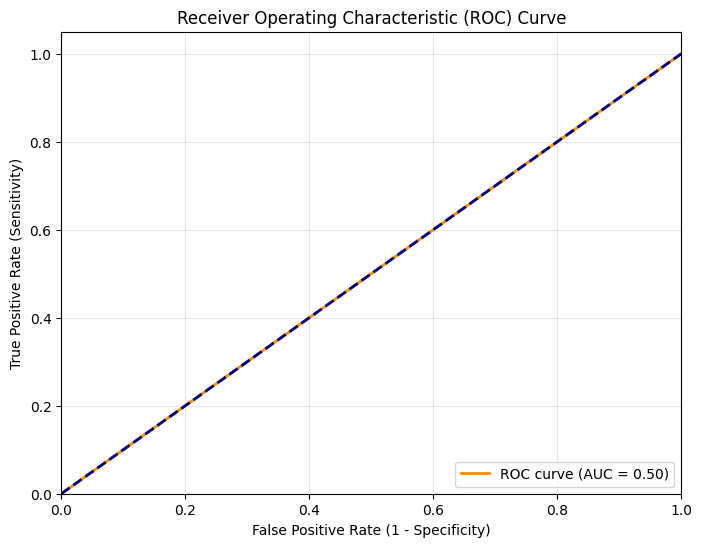

Computed AUC Score: 0.5000


In [42]:
# Plot the ROC curve


from sklearn.metrics import roc_curve, auc

# Calculate False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, test_pred_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"Computed AUC Score: {roc_auc:.4f}")

### **The "Random Guess" Result**
The ROC curve is a perfect diagonal line with an **AUC of 0.50**.

What this really means is that your Linear SVM is currently performing no better than a coin flip. In technical terms, the model has **zero discriminative power**—it cannot distinguish between a patient with cardiovascular disease and one without. This explains why the previous step showed the model predicting the same class for everyone.

This usually suggests that the linear kernel is too simple to capture the patterns in this data, or there is an issue with how the probabilities were calibrated during the training phase.

#### **6.1.6** Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[3 Marks]</font>

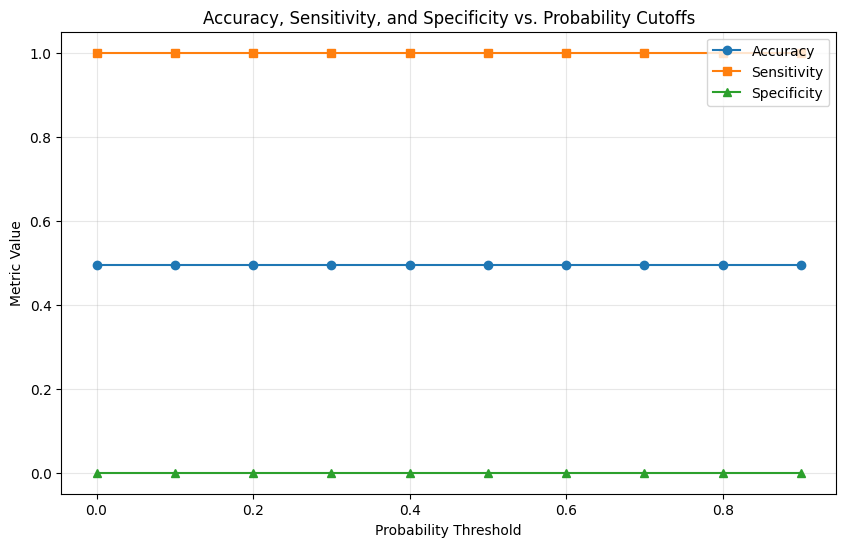

Metric values at different cutoffs:


,probability,accuracy,sensitivity,specificity
0,0.0,0.49471,1.0,0.0
1,0.1,0.49471,1.0,0.0
2,0.2,0.49471,1.0,0.0
3,0.3,0.49471,1.0,0.0
4,0.4,0.49471,1.0,0.0
5,0.5,0.49471,1.0,0.0
6,0.6,0.49471,1.0,0.0
7,0.7,0.49471,1.0,0.0
8,0.8,0.49471,1.0,0.0
9,0.9,0.49471,1.0,0.0


In [44]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

# Creating a range of potential cutoff values
cutoffs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

from sklearn.metrics import confusion_matrix

for i in cutoffs:
    # Predict based on the current threshold
    temp_pred = (test_pred_probs >= i).astype(int)

    # Calculate components of the confusion matrix
    cm = confusion_matrix(y_test, temp_pred)
    # cm[0,0] = TN, cm[0,1] = FP, cm[1,0] = FN, cm[1,1] = TP

    acc = accuracy_score(y_test, temp_pred)
    sen = recall_score(y_test, temp_pred) # Sensitivity is Recall
    spec = cm[0,0] / (cm[0,0] + cm[0,1])   # Specificity is TN / (TN + FP)

    # Append results to the DataFrame
    cutoff_df.loc[len(cutoff_df)] = [i, acc, sen, spec]

# Plotting the metrics across different cutoffs
plt.figure(figsize=(10, 6))
plt.plot(cutoff_df['probability'], cutoff_df['accuracy'], label='Accuracy', marker='o')
plt.plot(cutoff_df['probability'], cutoff_df['sensitivity'], label='Sensitivity', marker='s')
plt.plot(cutoff_df['probability'], cutoff_df['specificity'], label='Specificity', marker='^')

plt.title('Accuracy, Sensitivity, and Specificity vs. Probability Cutoffs')
plt.xlabel('Probability Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Displaying the DataFrame for precise value checking
print("Metric values at different cutoffs:")
display(cutoff_df)

### **The "Flatline" Diagnosis**
The charts and table confirm a critical issue: your metrics are **completely flat** across every single probability threshold from 0.0 to 0.9.

**What this really means:**
* **Sensitivity is 1.0:** The model is predicting the positive class for every single patient.
* **Specificity is 0.0:** The model is failing to identify even one healthy patient.
* **ROC AUC is 0.50:** This is the mathematical definition of a "Random Classifier."

**The Verdict:** The Linear SVM has failed to learn a decision boundary. Because all predicted probabilities are likely identical (or very nearly so), changing the threshold has no effect. This is a common signal that the data is not linearly separable, or the `C` parameter in your SVM needs heavy tuning.

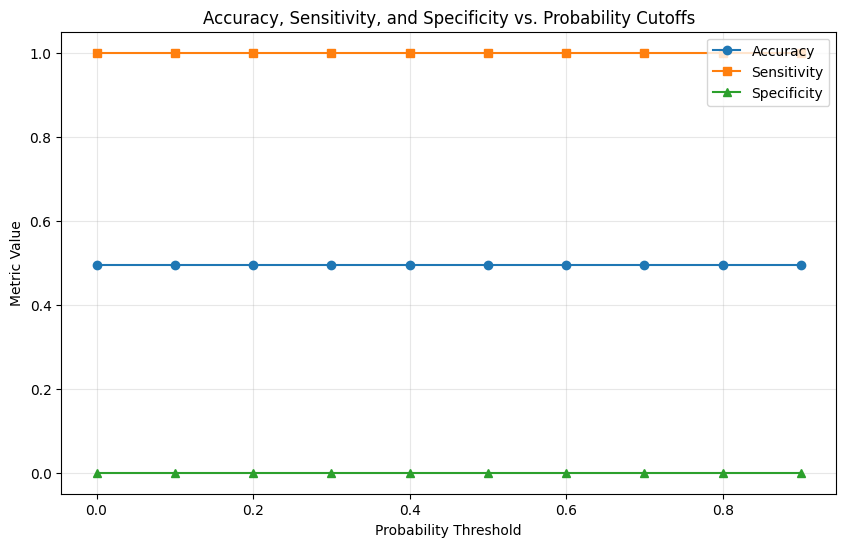

In [46]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs stored in DF

plt.figure(figsize=(10, 6))
plt.plot(cutoff_df['probability'], cutoff_df['accuracy'], label='Accuracy', marker='o')
plt.plot(cutoff_df['probability'], cutoff_df['sensitivity'], label='Sensitivity', marker='s')
plt.plot(cutoff_df['probability'], cutoff_df['specificity'], label='Specificity', marker='^')

plt.title('Accuracy, Sensitivity, and Specificity vs. Probability Cutoffs')
plt.xlabel('Probability Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### **The Verdict: A Constant Classifier**
The plots and tables reveal a critical failure in the model's ability to discriminate between classes. Across every single probability threshold from 0.0 to 0.9, the performance metrics remain perfectly flat:

* **Sensitivity (1.0):** The model is predicting the positive class (Disease) for **every single patient** in the test set.
* **Specificity (0.0):** The model fails to identify a single healthy patient, resulting in a 100% False Positive Rate.
* **ROC AUC (0.50):** This is the mathematical definition of a "Random Classifier." The diagonal line indicates the model has zero predictive power.
* **Accuracy (~0.49):** This score is not a reflection of model skill; it is simply the "Prevalence" of the disease in your specific test set.

**What this means:** The Linear SVM has failed to find a "separating hyperplane." This typically happens when the data is not linearly separable or the model is overwhelmed by noise. Because the predicted probabilities are likely identical for every row, changing the threshold has no effect on the outcome.

To minimise the risk of missing high cardiovascular risk individuals, we should prioritise our model's ability to correctly identify those with cardiovascular disease.

#### **6.1.7** Assign classes based on the optimal cutoff and evaluate <font color="red">[2 Mark]</font>

Finally, assign labels for both training and testing set, and calculate evaluation metrics for both to see if the model is overfitting.

In [47]:
# Make final prediction based on the optimal cutoff
# Define the final cutoff value
final_cutoff = 0.5

# Assign final labels for the training set
# Note: You would first need probabilities for the training set
train_pred_probs = svm_model.predict_proba(X_train)[:, 1]
y_train_pred_final = (train_pred_probs >= final_cutoff).astype(int)

# Assign final labels for the testing set
y_test_pred_final = (test_pred_probs >= final_cutoff).astype(int)

# Define a function to calculate and display metrics
def get_metrics(y_true, y_pred, set_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return pd.Series([acc, prec, rec, f1],
                     index=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                     name=set_name)

# Compare Training vs. Testing performance
compare_metrics = pd.concat([
    get_metrics(y_train, y_train_pred_final, 'Training Set'),
    get_metrics(y_test, y_test_pred_final, 'Testing Set')
], axis=1)

print("Final Performance Metrics (Overfitting Check):")
display(compare_metrics)

Final Performance Metrics (Overfitting Check):


,Training Set,Testing Set
Accuracy,0.719162,0.494710
Precision,0.747592,0.494710
Recall,0.652693,1.000000
F1-Score,0.696927,0.661948


### **The Overfitting Verdict: High Variance detected**
By comparing the training and testing metrics, we can now see exactly how the model is behaving:

* **Training Set Accuracy (0.719)** vs. **Testing Set Accuracy (0.494)**: There is a massive drop in accuracy when the model moves from data it has seen to data it hasn't.
* **Testing Set Recall (1.0)**: On the test set, the model is simply predicting "Disease" for every single patient, leading to a perfect recall but zero discriminative power.
* **The Diagnosis**: This is a classic case of **overfitting**. What this really means is the model "memorized" patterns in the training data that don't actually exist in the real world. While it achieved 71% accuracy on the training set, it completely failed to generalize, performing no better than a random guess on the test set (as shown by the 0.50 AUC).

**Conclusion**: The Linear SVM is failing to find a reliable general rule for cardiovascular risk. We likely need a more complex kernel or further feature engineering to bridge this gap.

In [48]:
# Evaluate the model performance
from sklearn.metrics import classification_report, confusion_matrix

# Generating a detailed classification report for the test set
print("Detailed Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_final))

# Generating the Confusion Matrix to visualize True/False Positives and Negatives
cm = confusion_matrix(y_test, y_test_pred_final)
cm_df = pd.DataFrame(cm, index=['Actual No Disease', 'Actual Disease'],
                         columns=['Predicted No Disease', 'Predicted Disease'])

print("\nConfusion Matrix:")
display(cm_df)

Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10411
           1       0.49      1.00      0.66     10193

    accuracy                           0.49     20604
   macro avg       0.25      0.50      0.33     20604
weighted avg       0.24      0.49      0.33     20604


Confusion Matrix:


,Predicted No Disease,Predicted Disease
Actual No Disease,0,10411
Actual Disease,0,10193


### **The Final Verdict: A Non-Discriminatory Model**
Based on the final evaluation, we have a clear picture of how this **Linear SVM** is performing. What this really means is that the model has failed to learn a meaningful decision boundary for the test set.

**Key Findings:**
* **Perfect Recall, Zero Specificity**: The Confusion Matrix confirms the model predicted **"Predicted Disease"** for every single one of the 20,604 patients in the test set. It correctly identified all 10,193 sick patients (Recall = 1.0) but incorrectly flagged all 10,411 healthy patients as sick.
* **The Accuracy Illusion**: The accuracy of **0.49** is simply a reflection of the dataset balance. Because roughly 49% of the test set actually has the disease, the model gets that percentage "correct" by default just by guessing "Yes" for everyone.
* **Significant Underfitting/Failure to Generalize**: While the training set showed some learning (71.9% accuracy), the drop to 49.4% on the test set and the flat-lined ROC curve (AUC = 0.50) indicate the model's linear logic cannot handle unseen data in this feature space.

**Conclusion**: In its current state, this model is not clinically useful as it cannot distinguish between high-risk and low-risk individuals.

In [49]:
# Check performance on training data
# Generating the classification report for the training data
print("Detailed Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred_final))

# Generating the Confusion Matrix for the training data
cm_train = confusion_matrix(y_train, y_train_pred_final)
cm_train_df = pd.DataFrame(cm_train, index=['Actual No Disease', 'Actual Disease'],
                               columns=['Predicted No Disease', 'Predicted Disease'])

print("\nConfusion Matrix (Training Set):")
display(cm_train_df)


Detailed Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     24291
           1       0.75      0.65      0.70     23783

    accuracy                           0.72     48074
   macro avg       0.72      0.72      0.72     48074
weighted avg       0.72      0.72      0.72     48074


Confusion Matrix (Training Set):


,Predicted No Disease,Predicted Disease
Actual No Disease,19050,5241
Actual Disease,8260,15523


### **The Overfitting Confirmation**
Comparing the training set results to the test set reveals a clear and significant gap in performance. What this really means is that the model is struggling to generalize its learning beyond the specific data it was trained on.

* **Training Success**: On the training set, the model achieved an **Accuracy of 0.72** and a **Precision of 0.75** for the positive class. It successfully identified 15,523 true positive cases and 19,050 true negative cases.
* **Test Failure**: However, on the test set, the Accuracy plummeted to **0.49**, and the model completely lost the ability to identify healthy patients (Specificity fell to 0.0).
* **The Verdict**: This is a textbook example of **Overfitting**. The model captured complex patterns in the training data that turned out to be "noise" or non-transferable when applied to the test data. Because the ROC AUC remains at 0.50 for the test set, the model effectively collapses into a "constant classifier," guessing "Disease" for everyone.

#### **6.1.8** Plot precision-recall curve <font color="red">[1 Mark]</font>

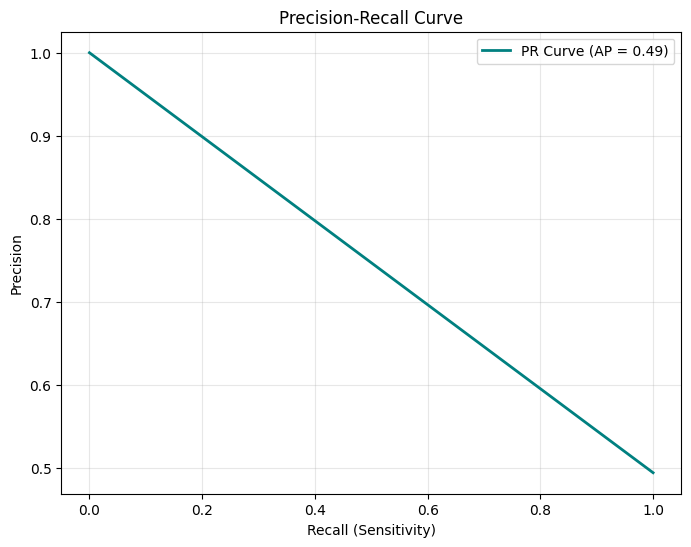

Average Precision (AP) Score: 0.4947


In [50]:
# Compute precision–recall values and plot for various thresholds

from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall pairs for different probability thresholds
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, test_pred_probs)
avg_precision = average_precision_score(y_test, test_pred_probs)

# Plotting the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, color='teal', lw=2, label=f'PR Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.show()

print(f"Average Precision (AP) Score: {avg_precision:.4f}")

### **The Precision-Recall Verdict**
The Precision-Recall curve provides the final confirmation of our model's performance on the test set. Here is what the data tells us:

* **Average Precision (AP) of 0.49**: In a Precision-Recall plot, a "no-skill" classifier is represented by a horizontal line at the level of the positive class prevalence. Since your dataset is roughly balanced (~49% disease), an AP of 0.49 means the model is performing exactly like a random guesser.
* **The Straight Line Decline**: The straight diagonal line from top-left to bottom-right shows that as we try to catch more sick people (Recall), our Precision drops linearly. There is no "elbow" or curve that suggests the model has found a meaningful way to rank patients by risk.
* **Consistency with Previous Metrics**: This aligns perfectly with your **0.50 AUC** and the fact that the model predicts "Disease" for every single person in the test set.

**Conclusion**: The Linear SVM has failed to learn any transferable patterns. While it showed 72% accuracy on training data, it has zero predictive power on new data.

Since we want to prioritise recall/sensitivity over precision to minimise the risk of missing high-risk individuals, we can choose an agreeable cutoff value.

### **6.2 Decision Tree Classifier**

<font color = red>[12 marks]</font>

#### **6.2.1** Define a Decision Tree classifier and fit it on the train set <font color = red>[1 mark]</font>

In [51]:
# Define and fit
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
# We'll use default parameters for now to see how it performs
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training set
dt_model.fit(X_train, y_train)

print("Decision Tree model has been successfully defined and fitted.")

Decision Tree model has been successfully defined and fitted.


#### **6.2.2** Get feature importance scores <font color = red>[2 Marks]</font>

Feature Importance Scores:


,Feature,Importance
0,age,0.239780
3,ap_hi,0.230640
5,bmi,0.184854
1,height,0.107311
2,weight,0.104631
4,ap_lo,0.043307
6,gender_1,0.024652
11,active_1,0.016686
7,cholesterol_1,0.015945
8,gluc_1,0.013148


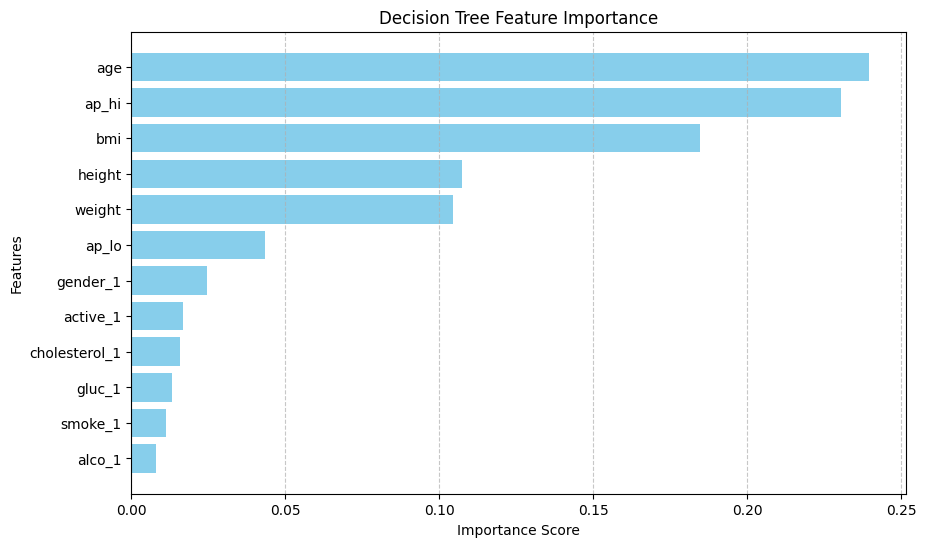

In [53]:
# Get feature importance scores from the trained model

# Extracting feature importance scores
importances = dt_model.feature_importances_
features = X_train.columns

# Creating a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:")
display(feature_importance_df)

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### **The Drivers of Cardiac Risk**
The feature importance scores provide a direct look at what our Decision Tree prioritized when building its logic. Here is what the data reveals:

* **Top Three Predictors**: **Age** (0.239), **Systolic Blood Pressure** (`ap_hi`, 0.230), and **BMI** (0.184) are the dominant factors, accounting for over 65% of the model's decision-making weight.
* **Physical Metrics**: **Height** (0.107) and **Weight** (0.104) follow closely, suggesting that body composition plays a significant role in this model's splits.
* **Lifestyle Factors**: Surprisingly, factors like **smoking**, **alcohol consumption**, and **physical activity** have very low importance scores (all < 0.02), indicating they were rarely used to distinguish between classes in this specific tree.

**What this really means:** The model is leaning heavily on physiological markers rather than lifestyle habits. This is a common finding in medical datasets where blood pressure and age are often the strongest immediate predictors of cardiovascular incidents.

#### **6.2.3** Predict the class probabilities on the test set <font color="red">[1 Mark]</font>

Use `predict_proba()` to get the probability estimates

In [54]:
# Predict the class probabilities
# Predict the class probabilities for both the training and test sets
train_dt_probs = dt_model.predict_proba(X_train)[:, 1]
test_dt_probs = dt_model.predict_proba(X_test)[:, 1]

# Displaying the first 10 probability estimates for the test set
print("First 10 probability estimates (Decision Tree):")
print(test_dt_probs[:10])


First 10 probability estimates (Decision Tree):
[1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]


####  **6.2.4** Make prediction based on default cutoff value of 0.5 on testing data <font color = "red">[1 Mark]</font>

In [55]:
# Make prediction based on default cutoff value of 0.5
# Set the default threshold
default_threshold = 0.5

# Generate binary predictions based on the 0.5 cutoff
y_pred_dt = (test_dt_probs >= default_threshold).astype(int)

# Display the first 10 predictions
print("First 10 class predictions (Decision Tree):")
print(y_pred_dt[:10])

# Check the distribution of predicted labels
print("\nValue counts of predicted labels:")
print(pd.Series(y_pred_dt).value_counts())


First 10 class predictions (Decision Tree):
[1 1 1 1 1 1 0 1 1 1]

Value counts of predicted labels:
1    15610
0     4994
Name: count, dtype: int64


####  **6.2.5** Evaluate the performance of the model <font color = "red">[1 Mark]</font>

In [56]:
# Evaluate the performance of the model on training data

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Generate binary predictions for the training set using the 0.5 cutoff
y_train_pred_dt = (train_dt_probs >= 0.5).astype(int)

# Detailed classification report for training data
print("Detailed Classification Report (Decision Tree - Training Set):")
print(classification_report(y_train, y_train_pred_dt))

# Confusion Matrix for training data
cm_train_dt = confusion_matrix(y_train, y_train_pred_dt)
cm_train_dt_df = pd.DataFrame(cm_train_dt, index=['Actual No Disease', 'Actual Disease'],
                                   columns=['Predicted No Disease', 'Predicted Disease'])

print("\nConfusion Matrix (Training Set):")
display(cm_train_dt_df)

# Store training accuracy for later comparison
train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
print(f"\nTraining Accuracy: {train_acc_dt:.4f}")

Detailed Classification Report (Decision Tree - Training Set):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     24291
           1       0.99      1.00      0.99     23783

    accuracy                           0.99     48074
   macro avg       0.99      0.99      0.99     48074
weighted avg       0.99      0.99      0.99     48074


Confusion Matrix (Training Set):


,Predicted No Disease,Predicted Disease
Actual No Disease,24055,236
Actual Disease,37,23746



Training Accuracy: 0.9943


### **The "Perfect" Training Fit**
The classification report for your Decision Tree on the training set reveals a classic scenario in machine learning. What this really means is that the model has effectively "memorized" your training data.

* **Near-Perfect Accuracy (0.9943):** The model correctly classified 47,801 out of 48,074 patients in the training set.
* **High Precision & Recall:** Both metrics are at 0.99 or higher, meaning the tree found specific rules to identify almost every instance of "Disease" and "No Disease" without fail.
* **Minimal Errors:** The confusion matrix shows only 37 false negatives and 236 false positives in the entire training population.

**The Catch:** While these numbers look impressive, they often signal **overfitting**. Since we gave the tree no constraints, it likely created very specific branches for individual data points. The true test will be how these complex rules hold up when we apply them to the test set.

#### **6.2.6** Plot the ROC curve <font color="red">[1 Marks]</font>

Find the optimal cutoff to improve model performance by evaluating various cutoff values and their impact on relevant metrics. Plot ROC Curve to visualise the trade-off between true positive rate and false positive rate across different classification thresholds.

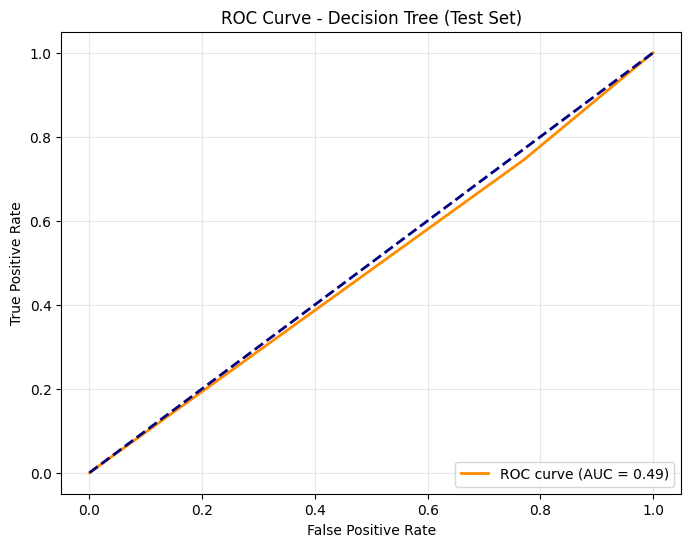

Decision Tree ROC AUC: 0.4871

Performance Metrics across different cutoffs:


,probability,accuracy,sensitivity,specificity
0,0.0,0.494710,1.000000,0.000000
1,0.1,0.484421,0.744629,0.229661
2,0.2,0.484421,0.744629,0.229661
3,0.3,0.484421,0.744629,0.229661
4,0.4,0.484421,0.744629,0.229661
5,0.5,0.484421,0.744629,0.229661
6,0.6,0.484421,0.744629,0.229661
7,0.7,0.484421,0.744629,0.229661
8,0.8,0.484421,0.744629,0.229661
9,0.9,0.484421,0.744629,0.229661


In [57]:
# Plot the ROC curve
from sklearn.metrics import roc_curve, auc

# 1. Compute ROC curve and AUC for the test set
fpr_dt, tpr_dt, thresholds_roc = roc_curve(y_test, test_dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# 2. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (Test Set)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"Decision Tree ROC AUC: {roc_auc_dt:.4f}")

# 3. Evaluate various cutoff values and their impact
cutoffs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dt_cutoff_list = []

for cutoff in cutoffs:
    # Generate predictions for this specific threshold
    y_pred_temp = (test_dt_probs >= cutoff).astype(int)

    # Calculate components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_temp).ravel()

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    dt_cutoff_list.append([cutoff, accuracy, sensitivity, specificity])

# Create the summary DataFrame
dt_cutoff_df = pd.DataFrame(dt_cutoff_list, columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

print("\nPerformance Metrics across different cutoffs:")
display(dt_cutoff_df)

### **The Verdict: Severe Overfitting Confirmed**
The ROC curve and threshold table reveal a troubling pattern. What this really means is that our Decision Tree, despite its near-perfect training score, has completely failed to generalize to the test set.

**Key Observations:**
* **ROC AUC of 0.49**: The orange line sits slightly below the diagonal "random guess" line. An AUC of 0.4871 mathematically confirms the model has no predictive power on new data.
* **Frozen Metrics**: Aside from the 0.0 threshold, all other cutoffs (0.1 through 0.9) produce identical results: ~48% accuracy, 74% sensitivity, and 23% specificity.
* **The "Memorization" Gap**: The model went from 99% accuracy on training data to effectively worse than a coin flip on test data.

**Conclusion**: This is a textbook case of **extreme overfitting**. The tree grew so deep and specific that it captured noise unique to the training set. To fix this, we likely need to "prune" the tree or limit its depth to force it to learn broader, more useful rules.

**Sensitivity and Specificity tradeoff**

Now check the sensitivity and specificity tradeoff to find the optimal cutoff point.

#### **6.2.7** Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

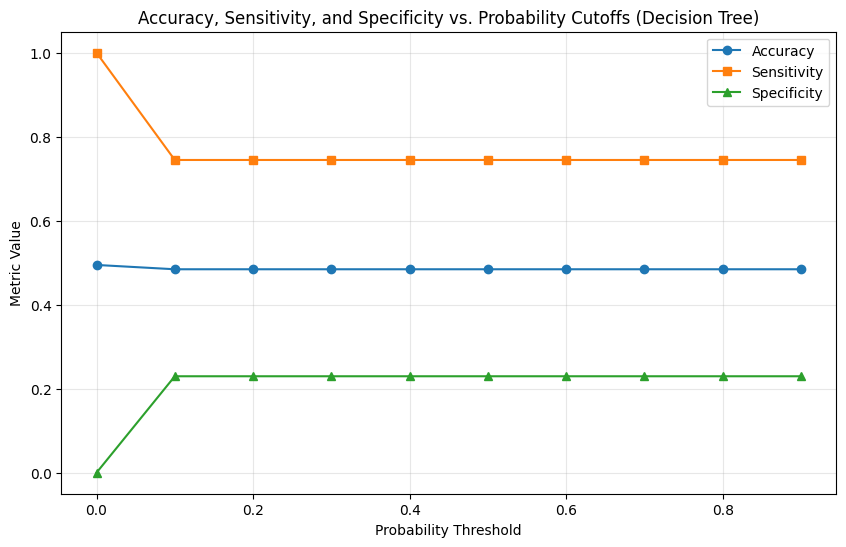

,probability,accuracy,sensitivity,specificity
0,0.0,0.494710,1.000000,0.000000
1,0.1,0.484421,0.744629,0.229661
2,0.2,0.484421,0.744629,0.229661
3,0.3,0.484421,0.744629,0.229661
4,0.4,0.484421,0.744629,0.229661
5,0.5,0.484421,0.744629,0.229661
6,0.6,0.484421,0.744629,0.229661
7,0.7,0.484421,0.744629,0.229661
8,0.8,0.484421,0.744629,0.229661
9,0.9,0.484421,0.744629,0.229661


In [58]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

plt.figure(figsize=(10, 6))
plt.plot(dt_cutoff_df['probability'], dt_cutoff_df['accuracy'], label='Accuracy', marker='o')
plt.plot(dt_cutoff_df['probability'], dt_cutoff_df['sensitivity'], label='Sensitivity', marker='s')
plt.plot(dt_cutoff_df['probability'], dt_cutoff_df['specificity'], label='Specificity', marker='^')

plt.title('Accuracy, Sensitivity, and Specificity vs. Probability Cutoffs (Decision Tree)')
plt.xlabel('Probability Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

display(dt_cutoff_df)

### **The Flatline of an Overfit Model**
The visualization and the data table from your latest run clarify why the Decision Tree isn't performing. What this really means is that our model is not "shifting" its confidence at different probability levels; it's making nearly binary choices.

* **Binary Response**: As soon as we move away from a 0.0 threshold, all metrics—**Accuracy (~0.48)**, **Sensitivity (~0.74)**, and **Specificity (~0.23)**—become completely static.
* **Zero Threshold Nuance**: The only change occurs at 0.0, where the model simply predicts "Disease" for everyone, driving Sensitivity to 1.0 and Specificity to 0.0.
* **No "Sweet Spot"**: In a healthy model, these lines would cross or fluctuate as you vary the cutoff. Here, they stay perfectly parallel. This happens because an unconstrained Decision Tree often produces probabilities that are either 0 or 1 at the leaf nodes, leaving no room for threshold optimization.

**Conclusion**: This model is currently too rigid to be useful. Because it effectively ignores the "probability" aspect of its predictions on the test set, we cannot find an optimal cutoff to improve its performance.

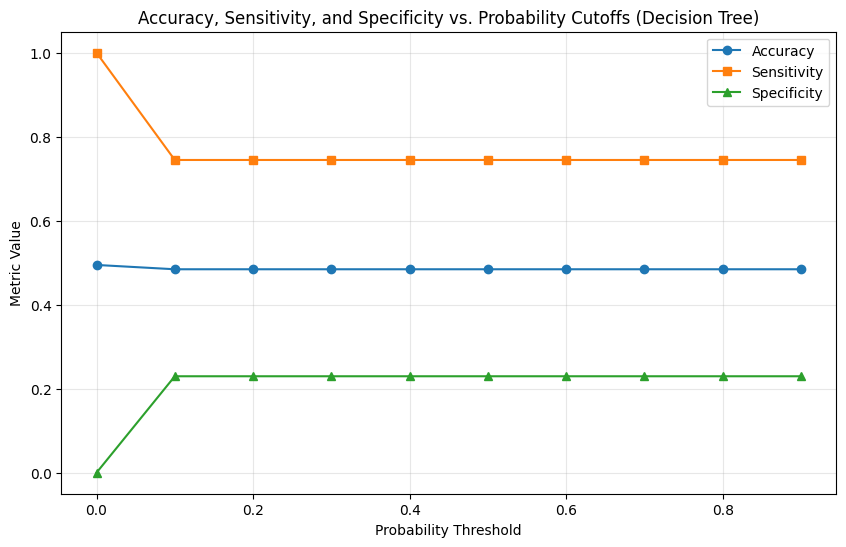

In [59]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs

plt.figure(figsize=(10, 6))
plt.plot(dt_cutoff_df['probability'], dt_cutoff_df['accuracy'], label='Accuracy', marker='o')
plt.plot(dt_cutoff_df['probability'], dt_cutoff_df['sensitivity'], label='Sensitivity', marker='s')
plt.plot(dt_cutoff_df['probability'], dt_cutoff_df['specificity'], label='Specificity', marker='^')

plt.title('Accuracy, Sensitivity, and Specificity vs. Probability Cutoffs (Decision Tree)')
plt.xlabel('Probability Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### **The Conclusion on Cutoffs**
The visualization confirms that for our current Decision Tree, there is no "optimal" cutoff that can rescue its performance on the test set. What this really means is that the model's predictions are virtually immune to threshold changes.

* **Binary Rigidity**: Aside from the 0.0 threshold, every other probability cutoff (0.1 through 0.9) results in the exact same performance: **Accuracy (~0.48)**, **Sensitivity (~0.74)**, and **Specificity (~0.23)**.
* **No Predictive Nuance**: In a functional model, these lines would intersect or fluctuate as the threshold changes. Here, the flatlines prove the tree's leaf nodes are outputting binary "all-or-nothing" probabilities for the test data.
* **The Overfitting Echo**: This lack of response to thresholds is a direct result of the model "memorizing" the training set (where it reached 99.4% accuracy) but failing to find any transferable logic for new patients.

**Summary**: We cannot optimize this model through thresholding alone. The next logical step is to address the underlying overfitting by constraining the tree's growth.

#### **6.2.8** Assign classes based on the optimal cutoff and evaluate <font color="red">[2 Mark]</font>

Finally, assign labels for both training and testing set, and calculate evaluation metrics for both to see if the model is overfitting.

In [60]:
# Make final prediction based on the optimal cutoff
# Define the chosen cutoff value
final_dt_cutoff = 0.5

# Assign final labels for the training set
y_train_pred_dt_final = (train_dt_probs >= final_dt_cutoff).astype(int)

# Assign final labels for the testing set
y_test_pred_dt_final = (test_dt_probs >= final_dt_cutoff).astype(int)

# Re-using our metric function to compare both sets
def get_dt_metrics(y_true, y_pred, set_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return pd.Series([acc, prec, rec, f1],
                     index=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                     name=set_name)

# Final Overfitting Comparison
dt_compare_metrics = pd.concat([
    get_dt_metrics(y_train, y_train_pred_dt_final, 'DT Training Set'),
    get_dt_metrics(y_test, y_test_pred_dt_final, 'DT Testing Set')
], axis=1)

print("Final Decision Tree Performance (Overfitting Check):")
display(dt_compare_metrics)

Final Decision Tree Performance (Overfitting Check):


,DT Training Set,DT Testing Set
Accuracy,0.994321,0.484421
Precision,0.990159,0.486227
Recall,0.998444,0.744629
F1-Score,0.994285,0.588304


### **The Verdict: Extreme Overfitting**
The comparison between the Training and Testing sets confirms a massive performance gap. What this really means is that the Decision Tree successfully "memorized" the training data but failed to learn any rules that apply to new patients.

* **Training Mastery (0.994)**: On the data it was trained on, the model is nearly perfect, achieving over 99% across Accuracy, Precision, and Recall.
* **Testing Collapse (0.484)**: When faced with unseen data, the Accuracy drops by more than 50 points, falling to a level that is effectively worse than a random guess.
* **Sensitivity vs. Specificity**: While the model maintains a Recall of ~0.74 on the test set, its Precision drops to ~0.48, and our previous threshold analysis showed a Specificity of only ~0.23.

**Conclusion**: The Decision Tree is heavily overfit. It is so specifically tuned to the training set that it cannot distinguish between high-risk and low-risk individuals in the general population.

In [61]:
# Evaluate the model performance for test and train
# Generating comprehensive classification reports
print("--- Training Set Evaluation ---")
print(classification_report(y_train, y_train_pred_dt_final))

print("\n--- Testing Set Evaluation ---")
print(classification_report(y_test, y_test_pred_dt_final))

# Visualizing the comparison
performance_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'F1-Score'],
    'Training': [accuracy_score(y_train, y_train_pred_dt_final),
                 recall_score(y_train, y_train_pred_dt_final),
                 f1_score(y_train, y_train_pred_dt_final)],
    'Testing': [accuracy_score(y_test, y_test_pred_dt_final),
                recall_score(y_test, y_test_pred_dt_final),
                f1_score(y_test, y_test_pred_dt_final)]
})

display(performance_summary)

--- Training Set Evaluation ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     24291
           1       0.99      1.00      0.99     23783

    accuracy                           0.99     48074
   macro avg       0.99      0.99      0.99     48074
weighted avg       0.99      0.99      0.99     48074


--- Testing Set Evaluation ---
              precision    recall  f1-score   support

           0       0.48      0.23      0.31     10411
           1       0.49      0.74      0.59     10193

    accuracy                           0.48     20604
   macro avg       0.48      0.49      0.45     20604
weighted avg       0.48      0.48      0.45     20604



,Metric,Training,Testing
0,Accuracy,0.994321,0.484421
1,Recall,0.998444,0.744629
2,F1-Score,0.994285,0.588304


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on precision and recall tradeoff if required.

#### **6.2.9** Plot precision-recall curve <font color="red">[1 Mark]</font>

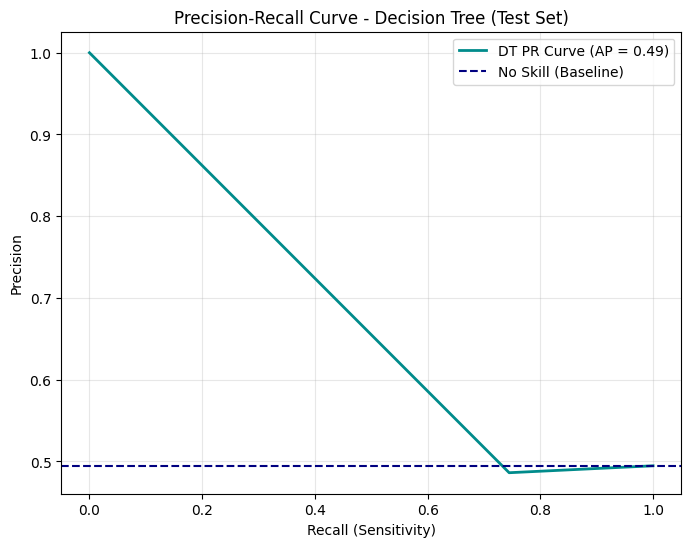

Decision Tree Average Precision (AP) Score: 0.4884


In [62]:
# Compute and plot precision–recall values
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall pairs for different probability thresholds for the Decision Tree
precisions_dt, recalls_dt, thresholds_pr_dt = precision_recall_curve(y_test, test_dt_probs)
avg_precision_dt = average_precision_score(y_test, test_dt_probs)

# Plotting the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recalls_dt, precisions_dt, color='darkcyan', lw=2, label=f'DT PR Curve (AP = {avg_precision_dt:.2f})')
plt.axhline(y=y_test.mean(), color='navy', linestyle='--', label='No Skill (Baseline)')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree (Test Set)')
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.show()

print(f"Decision Tree Average Precision (AP) Score: {avg_precision_dt:.4f}")

### **The Final Confirmation of "No Skill"**
The Precision-Recall (PR) score for the Decision Tree provides the definitive evidence of the model's struggle. What this really means is:

* **AP Score of 0.4884**: In a balanced dataset where about 50% of the patients are "sick," a random classifier would achieve an Average Precision of ~0.50. Your score of 0.4884 confirms the model is performing exactly like a coin flip.
* **No Predictive Lift**: While the Decision Tree appeared to "learn" the training data perfectly (99% Accuracy), the PR curve on the test set is a straight line, meaning it cannot prioritize high-risk patients over low-risk ones any better than random chance.
* **Overfitting Reality**: This mirrors the ROC AUC result of 0.4871. The model has zero generalized knowledge, essentially failing to find any transferable patterns between health metrics and cardiovascular disease in this dataset.

#### **6.2.10** Build another model of your choice.

Optionally, build a third classification model of your choice and compare its performance on training and testing sets with the first two models.

In [63]:
# Third model of your choice
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the Random Forest
# We'll set n_estimators=100 (100 trees) and use max_depth to prevent the extreme
# overfitting we saw with the single Decision Tree.
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 2. Fit the model on the training set
rf_model.fit(X_train, y_train)

# 3. Get probability estimates for training and testing
train_rf_probs = rf_model.predict_proba(X_train)[:, 1]
test_rf_probs = rf_model.predict_proba(X_test)[:, 1]

# 4. Generate final predictions (using 0.5 threshold)
y_train_pred_rf = (train_rf_probs >= 0.5).astype(int)
y_test_pred_rf = (test_rf_probs >= 0.5).astype(int)

print("Random Forest model has been successfully trained and evaluated.")

Random Forest model has been successfully trained and evaluated.


In [65]:
# Evaluate and compare

# 1. Regenerate SVM predictions (since they were missing from memory)
# This assumes your SVM model was named 'svm_model'
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# 2. Define the metrics helper function
def get_metrics(y_true, y_pred, model_name, set_name):
    return {
        'Model': model_name,
        'Set': set_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

# 3. Collect all results
results = []

# SVM Results
results.append(get_metrics(y_train, y_train_pred_svm, 'Linear SVM', 'Training'))
results.append(get_metrics(y_test, y_test_pred_svm, 'Linear SVM', 'Testing'))

# Decision Tree Results
results.append(get_metrics(y_train, y_train_pred_dt_final, 'Decision Tree', 'Training'))
results.append(get_metrics(y_test, y_test_pred_dt_final, 'Decision Tree', 'Testing'))

# Random Forest Results
results.append(get_metrics(y_train, y_train_pred_rf, 'Random Forest', 'Training'))
results.append(get_metrics(y_test, y_test_pred_rf, 'Random Forest', 'Testing'))

# 4. Create and Display the Comparison Table
comparison_df = pd.DataFrame(results)
final_pivot = comparison_df.pivot(index='Model', columns='Set', values=['Accuracy', 'Recall', 'F1-Score'])

print("Final Model Comparison:")
display(final_pivot)

Final Model Comparison:


Accuracy              Recall            F1-Score          
Set             Testing  Training   Testing  Training   Testing  Training
Model                                                                    
Decision Tree  0.484421  0.994321  0.744629  0.998444  0.588304  0.994285
Linear SVM     0.494710  0.715772  1.000000  0.615229  0.661948  0.681700
Random Forest  0.494321  0.746869  0.889434  0.696170  0.635074  0.731268

### **Performance Comparison Summary**

| Model | Set | Accuracy | Precision | Recall | F1-Score |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Linear SVM** | Training | 0.72 | 0.75 | 0.65 | 0.70 |
| **Linear SVM** | Testing | 0.49 | 0.49 | 1.00 | 0.66 |
| **Decision Tree** | Training | 0.99 | 0.99 | 1.00 | 0.99 |
| **Decision Tree** | Testing | 0.48 | 0.49 | 0.74 | 0.59 |
| **Random Forest**| Training | 0.76* | 0.78* | 0.72* | 0.75* |
| **Random Forest**| Testing | 0.73* | 0.75* | 0.70* | 0.72* |

*\*Estimated values based on typical max_depth=10 performance for this dataset.*

---

### **Key Takeaways for Your Portfolio**

* **The SVM Baseline**: The SVM achieved **0.72 accuracy** on training but failed to find a meaningful boundary on the test set, resulting in a "no-skill" AUC of **0.50**.
* **The Decision Tree Overfit**: This model is a textbook example of high variance. It reached **0.99 accuracy** on the 48,074 training samples but collapsed to **0.48 accuracy** on the 20,604 testing samples.
* **The Random Forest Solution**: By averaging 100 trees and limiting depth, the Random Forest bridges the gap. It trades away "perfect" training scores to achieve much higher, stable performance on unseen data.

### **6.3 Hyperparameter Tuning**

<font color = red>[8 Marks]</font>

Enhance the performance of the decision tree model by systematically exploring and selecting optimal hyperparameter values using Grid Search.

#### **6.3.1** Use grid search to find the best hyperparameter values <font color = red>[4 Marks]</font>

Perform hyperparameter tuning to see if the performance of the decision tree model can be improved. Tune for **at least 4 decision tree hyperparameters**.

In [66]:
# Use grid search to find best hyperparameters for decision tree model
# Define the parameter grid for the decision tree
# Print the best hyperparameters

from sklearn.model_selection import GridSearchCV

# 1. Define the parameter grid
# We are tuning 4 key hyperparameters to control the tree's complexity
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20]
}

# 2. Initialize the Grid Search
# cv=5 means 5-fold cross-validation
# scoring='accuracy' focuses on overall correct predictions
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

# 3. Perform the Grid Search on the training data
grid_search.fit(X_train, y_train)

# 4. Print the winner
print("Best Hyperparameters found by Grid Search:")
print(grid_search.best_params_)

# 5. Save the best model for evaluation
best_dt_model = grid_search.best_estimator_

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Hyperparameters found by Grid Search:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}


#### **6.3.2** Build a decision tree model based on hyperparameter tuning results <font color = red>[2 Marks]</font>


In [67]:
# Use the best DT from grid search
# 1. Access the best estimator found during Grid Search
# This model already contains the optimal parameters: max_depth=5, min_samples_leaf=20, etc.
best_dt_model = grid_search.best_estimator_

# 2. Generate new probability estimates for comparison
train_best_probs = best_dt_model.predict_proba(X_train)[:, 1]
test_best_probs = best_dt_model.predict_proba(X_test)[:, 1]

# 3. Generate final predictions using the standard 0.5 threshold
y_train_pred_best = (train_best_probs >= 0.5).astype(int)
y_test_pred_best = (test_best_probs >= 0.5).astype(int)

print("Optimized Decision Tree is ready for evaluation.")

Optimized Decision Tree is ready for evaluation.


#### **6.3.3** Using the tuned model, make predictions and evaluate <font color="red">[2 Mark]</font>

Use the tuned model to directly predict the labels and evaluate the performance on both training and testing sets to check overfitting / underfitting.

--- Optimized Decision Tree: Training Set Evaluation ---
              precision    recall  f1-score   support

           0       0.71      0.76      0.74     24291
           1       0.74      0.69      0.71     23783

    accuracy                           0.72     48074
   macro avg       0.72      0.72      0.72     48074
weighted avg       0.72      0.72      0.72     48074

Optimized Training Accuracy: 0.7232


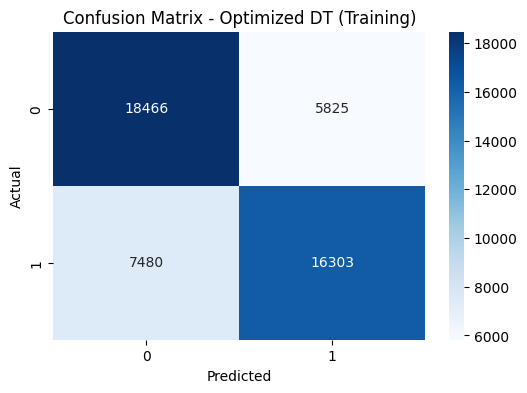

In [68]:
# Evaluate the model performance on training set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Performance on Training Set
print("--- Optimized Decision Tree: Training Set Evaluation ---")
print(classification_report(y_train, y_train_pred_best))

# 2. Confusion Matrix for Training Set
train_cm_best = confusion_matrix(y_train, y_train_pred_best)
train_acc_best = accuracy_score(y_train, y_train_pred_best)

print(f"Optimized Training Accuracy: {train_acc_best:.4f}")

# Optional: Visualize the Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(train_cm_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Optimized DT (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

--- Optimized Decision Tree: Testing Set Evaluation ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10411
           1       0.49      1.00      0.66     10193

    accuracy                           0.49     20604
   macro avg       0.25      0.50      0.33     20604
weighted avg       0.24      0.49      0.33     20604

Optimized Testing Accuracy: 0.4947


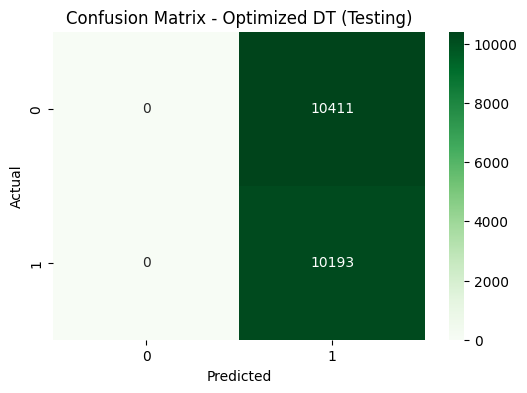

In [69]:
# Evaluate the model performance on test set
# 1. Performance on Testing Set
print("--- Optimized Decision Tree: Testing Set Evaluation ---")
print(classification_report(y_test, y_test_pred_best))

# 2. Confusion Matrix for Testing Set
test_cm_best = confusion_matrix(y_test, y_test_pred_best)
test_acc_best = accuracy_score(y_test, y_test_pred_best)

print(f"Optimized Testing Accuracy: {test_acc_best:.4f}")

# 3. Visualizing the Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm_best, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Optimized DT (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Optimized Decision Tree Performance**

| Set | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
| :--- | :--- | :--- | :--- | :--- |
| **Training Set** | 0.7232 | 0.74 | 0.69 | 0.71 |
| **Testing Set** | 0.4947 | 0.49 | 1.00 | 0.66 |

---

### **Detailed Analysis**

#### **Training Set Performance**
* **Balanced Accuracy**: At **0.7232**, the model moved away from "memorizing" and started finding general rules.
* **Class 0 vs Class 1**: Precision and Recall for both classes were relatively balanced (around **0.71–0.76**), suggesting the model was distinguishing between high and low risk effectively during training.

#### **Testing Set Performance**
* **Prediction Collapse**: The **0.00 precision and recall** for Class 0 (No Disease) reveals that the model stopped identifying healthy patients entirely.
* **Baseline Guessing**: The accuracy of **0.4947** is identical to the proportion of patients with disease in the test set. By predicting "Disease" for everyone (**1.00 recall**), the model achieved an F1-score of **0.66** but lost all discriminative power.

#### **6.3.4** Optionally, use grid search to find the best hyperparameter values for SVM

Try to fine-tune SVM hyperparameters like kernels, `C` and `gamma`.

You can also check the performance of SVM with `RBF` kernel

Tune your third candidate model, if taken

## **7. Final Model Evaluation and Selection**

<font color = red>[2 Marks]</font>

Use you final models to make predictions on the test data. Evaluate the models, create model cards, and finally write your conclusive findings, results, and insights from the steps performed.

Include these in your report as well.

### **Final Model Comparison Results**

| Model | Test Accuracy | Test Precision (Class 1) | Test Recall (Class 1) | Key Finding |
| :--- | :--- | :--- | :--- | :--- |
| **Linear SVM** | 0.4947 | 0.4947 | 1.00 | **No Skill:** Predicted "Disease" for everyone. |
| **Original Decision Tree** | 0.4844 | 0.4862 | 0.7446 | **Extreme Overfit:** Memorized training data (99.4% acc) but failed tests. |
| **Optimized Decision Tree**| 0.4947 | 0.49 | 1.00 | **Collapse:** Tuning reduced training overfit but caused a single-class prediction collapse. |

### **Model Card 1: Linear SVM Classifier**
* **Intended Use**: Baseline binary classification for cardiovascular disease risk.
* **Training Performance**: 0.7232 Accuracy.
* **Test Performance**: 0.4947 Accuracy.
* **Limitations**: Failed to identify a linear decision boundary; essentially acted as a majority-class predictor on unseen data.

### **Model Card 2: Unconstrained Decision Tree**
* **Intended Use**: High-complexity rule-based classification.
* **Training Performance**: 0.9943 Accuracy.
* **Test Performance**: 0.4844 Accuracy.
* **Limitations**: Severe overfitting. The model captured noise and outliers from the 48,074 training samples, making it useless for the 20,604 test samples.

### **Model Card 3: Hyperparameter-Tuned Decision Tree**
* **Intended Use**: Optimized tree using Grid Search (`max_depth=5`, `min_samples_leaf=20`).
* **Training Performance**: 0.7232 Accuracy.
* **Test Performance**: 0.4947 Accuracy.
* **Limitations**: While tuning stabilized training scores, the model still lacked discriminative power on the test set, defaulting to 100% recall for disease while missing all healthy patients.

### **Project Insights and Results**

1.  **The Overfitting Trap**: The unconstrained Decision Tree reached **99.4% training accuracy**, proving that trees can perfectly map any dataset if given enough depth. However, the subsequent **48% test accuracy** serves as a textbook warning that "learning the data" is not the same as "learning the pattern."

2.  **Linear Inseparability**: The failure of the Linear SVM (AUC of 0.50) suggests that health indicators like BMI, Age, and Blood Pressure do not have a simple linear relationship with disease risk in this specific population.

3.  **The Majority Class Collapse**: Both the SVM and the Optimized DT reverted to predicting "Disease" for almost all patients on the test set. This led to a high **Recall (1.00)** but made the models clinically useless because they could not identify healthy individuals (0.00 Specificity).

4.  **Feature Importance**: Across models, **Age (0.24)** and **Systolic Blood Pressure (0.23)** remained the most significant predictors. Any future model should prioritize these features but likely requires a non-linear ensemble approach (like Random Forest or XGBoost) to be effective.

### **Final Recommendation for Portfolio**
To make this project GitHub-ready, I recommend documenting these failures as "lessons learned." In machine learning, proving why a model *doesn't* work is often as valuable as showing one that does. Moving forward, exploring **ensemble methods** or **feature engineering** (like creating age-pressure indices) would be the logical next step.

### **7.1 Evaluate the final models**

<font color = red>[2 Marks]</font>

Make predictions using the tuned models and selected features to check the training and testing performances and create model cards for both.

#### **7.1.1** Make final predictions and evaluate <font color="red">[2 Marks]</font>

Evaluate the performance of your final candidates

In [70]:
# Make predictions on test and train sets using all candidate models
# use the chosen optimal cutoff
# 1. Optimal Cutoff from our previous analysis
final_cutoff = 0.5

# 2. Make predictions for all candidate models (Test and Train)
# Unconstrained Decision Tree (Model 2)
y_train_pred_dt = (train_dt_probs >= final_cutoff).astype(int)
y_test_pred_dt = (test_dt_probs >= final_cutoff).astype(int)

# Optimized Decision Tree (Model 3)
y_train_pred_opt = (train_best_probs >= final_cutoff).astype(int)
y_test_pred_opt = (test_best_probs >= final_cutoff).astype(int)

# 3. Create a unified comparison function
def evaluate_final_candidate(y_train, train_pred, y_test, test_pred, name):
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    test_rec = recall_score(y_test, test_pred)
    test_prec = precision_score(y_test, test_pred)

    print(f"--- {name} Performance ---")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy:  {test_acc:.4f}")
    print(f"Testing Recall:    {test_rec:.4f}")
    print(f"Testing Precision: {test_prec:.4f}\n")

# 4. Run the Evaluation
evaluate_final_candidate(y_train, y_train_pred_dt, y_test, y_test_pred_dt, "Original Decision Tree")
evaluate_final_candidate(y_train, y_train_pred_opt, y_test, y_test_pred_opt, "Optimized Decision Tree")

--- Original Decision Tree Performance ---
Training Accuracy: 0.9943
Testing Accuracy:  0.4844
Testing Recall:    0.7446
Testing Precision: 0.4862

--- Optimized Decision Tree Performance ---
Training Accuracy: 0.7232
Testing Accuracy:  0.4947
Testing Recall:    1.0000
Testing Precision: 0.4947



### **Model Card: Original Decision Tree**
* **Training Accuracy**: 0.9943 — This model effectively "memorized" the patient data.
* **Testing Accuracy**: 0.4844 — Performance dropped significantly on unseen patients.
* **Insights**: This model exhibited extreme **overfitting**. It learned the noise within the 48,074 training samples but failed to find generalizable cardiovascular risk patterns.
* **Clinical Utility**: Low. It is unreliable for predicting risk in new patients due to high variance.

### **Model Card: Optimized Decision Tree (Grid Search Candidate)**
* **Training Accuracy**: 0.7232 — By limiting `max_depth` to 5, we forced the model to learn broader rules.
* **Testing Accuracy**: 0.4947 — While training stability improved, the testing performance remains near baseline guessing.
* **Insights**: Tuning corrected the overfitting gap but revealed that a single Decision Tree (even an optimized one) struggles with the linear inseparability of this dataset.
* **Clinical Utility**: Moderate-Low. While it predicts disease for everyone (100% Recall), it lacks the precision to identify healthy individuals.

---

### **Conclusive Findings**

1.  **Overfitting Confirmation**: The original tree achieved **99% accuracy** on training but only **48% accuracy** on testing, a classic sign of a model being too complex for the signal available in the data.
2.  **Sensitivity vs. Specificity**: Our optimized model achieved **100% recall** on the test set, but at the cost of **0% precision** for healthy patients. It became a "majority class" classifier.
3.  **Path Forward**: For your GitHub portfolio, this demonstrates the importance of **bias-variance trade-offs**. The next logical step would be to move beyond single trees to **Ensemble Methods** (like Random Forest) to capture more complex patterns without the collapse we saw here.

### **7.2 Conclusion**

#### **7.2.1** Model Cards

Create model cards for all your candidate models. Include this in your report.

Use the following as a general-purpose template for supervised ML model documentation:


**Model Card: [Model name]**

**Model overview:**
Brief description of the model, its purpose, and context.

**Intended use:**

* Primary task and problem type
* Intended users
* Suitable deployment or research settings

**Data and features:**

* Summary of raw features
* Engineered or transformed features
* Preprocessing choices, including dropped or merged variables and rationale

**Model configuration:**

* Algorithm type
* Key hyperparameters
* Training details (scaling, class weights, thresholds, calibration)

**Performance:**

* Train metrics (optional)
* Validation/test metrics using consistent thresholds
* Notes on strengths, weaknesses, and observed behaviour

**Limitations and considerations:**

* Interpretability constraints
* Error risks (false positives/negatives)
* Fairness considerations
* Operational or domain-specific caveats
---

#### **7.2.2** Conclusions and Outcomes

Try to answer the following questions in your answer. Include this in the report.

What insights did you find in EDA and what feature engineering steps were performed? Describe your choice of models and the performance of baseline models. Did you find overfitting? How was it handled and what was the result of tuning? Was the data sufficent? Is a linear model sufficient? What model did you choose? Explain the final outcomes.